In [1]:
# importing the necessary libraries
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the path to the CSV files downloded from :https://data.telangana.gov.in/dataset/telangana-women-and-child-development-number-pregnant-lactating-women-enrolled-anganwadi
file_path = r'D:/awc/*.csv' 

In [3]:
# Get a list of all CSV files matching the pattern
csv_files = sorted(glob.glob(file_path))

In [4]:
# Initialize an empty list to store DataFrames
dataframes = []

In [5]:
# Loop over the list of files and read them into DataFrames
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

In [6]:
dataframes

[       Reporting Year  Reporting Month      D_Name       Proj_Name  \
 0                2018                4  HANMAKONDA  HANAMKONDA (U)   
 1                2018                4  HANMAKONDA  HANAMKONDA (U)   
 2                2018                4  HANMAKONDA  HANAMKONDA (U)   
 3                2018                4  HANMAKONDA  HANAMKONDA (U)   
 4                2018                4  HANMAKONDA  HANAMKONDA (U)   
 ...               ...              ...         ...             ...   
 35695            2018                4    WARANGAL       NARSAMPET   
 35696            2018                4    WARANGAL     WARANGAL(U)   
 35697            2018                4    WARANGAL     WARANGAL(U)   
 35698            2018                4    WARANGAL     WARANGAL(U)   
 35699            2018                4    WARANGAL     WARANGAL(U)   
 
           Sec_NAme   AWC_ID          AWc_Name  Tot_PW  Tot_SC_PW  Tot_ST_PW  \
 0      Dharmasagar  2104084     Dharmasagar-4       4          4 

In [7]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

In [8]:
# Convert 'Reporting Month' and 'Reporting Year' to a datetime object for sorting
combined_df['Date'] = pd.to_datetime(combined_df['Reporting Year'].astype(str) + '-' + combined_df['Reporting Month'].astype(str), errors='coerce')

In [9]:
# Check for any invalid date conversions
if combined_df['Date'].isnull().any():
    print("Warning: There are rows with invalid dates that could not be parsed.")
    

In [10]:
# Sort the DataFrame by the new Date column
combined_df = combined_df.sort_values(by='Date')


In [11]:
# Drop the temporary Date column if it's not needed anymore
# combined_df = combined_df.drop(columns=['Date'])

In [12]:
# Reset index after sorting
combined_df = combined_df.reset_index(drop=True)

In [13]:
# Display the first few rows for verification
print(combined_df.head())

   Reporting Year  Reporting Month                D_Name  Proj_Name  \
0            2018                1            RANGAREDDY   CHEVELLA   
1            2018                1  BHADRADRI-KOTHAGUDEM  DAMMAPETA   
2            2018                1  BHADRADRI-KOTHAGUDEM  DAMMAPETA   
3            2018                1  BHADRADRI-KOTHAGUDEM  DAMMAPETA   
4            2018                1  BHADRADRI-KOTHAGUDEM  DAMMAPETA   

        Sec_NAme   AWC_ID             AWc_Name  Tot_PW  Tot_SC_PW  Tot_ST_PW  \
0  SHANKAR PALLY  1502135            Perveda I       8          3          0   
1      Pusugudem  2216212  Narasimhapuram Mini       1          0          1   
2      Pusugudem  2216208          Kummaripadu       4          0          4   
3      Pusugudem  2216201         Gurralakunta       0          0          0   
4      Pusugudem  2216194     Chaparalapalli 1       3          0          2   

   Tot_BC_PW  Tot_OC_PW  Tot_LW  Tot_SC_LW  Tot_ST_LW  Tot_BC_LW  Tot_OC_LW  \
0          4 

In [16]:
# Optional: Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)

In [15]:
combined_df

,Reporting Year,Reporting Month,D_Name,Proj_Name,Sec_NAme,AWC_ID,AWc_Name,Tot_PW,Tot_SC_PW,Tot_ST_PW,Tot_BC_PW,Tot_OC_PW,Tot_LW,Tot_SC_LW,Tot_ST_LW,Tot_BC_LW,Tot_OC_LW,Date
0,2018,1,RANGAREDDY,CHEVELLA,SHANKAR PALLY,1502135,Perveda I,8,3,0,4,1,5,0,0,4,1,2018-01-01
1,2018,1,BHADRADRI-KOTHAGUDEM,DAMMAPETA,Pusugudem,2216212,Narasimhapuram Mini,1,0,1,0,0,0,0,0,0,0,2018-01-01
2,2018,1,BHADRADRI-KOTHAGUDEM,DAMMAPETA,Pusugudem,2216208,Kummaripadu,4,0,4,0,0,3,0,3,0,0,2018-01-01
3,2018,1,BHADRADRI-KOTHAGUDEM,DAMMAPETA,Pusugudem,2216201,Gurralakunta,0,0,0,0,0,0,0,0,0,0,2018-01-01
4,2018,1,BHADRADRI-KOTHAGUDEM,DAMMAPETA,Pusugudem,2216194,Chaparalapalli 1,3,0,2,1,0,2,0,1,1,0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641795,2024,2,NALGONDA,MIRYALAGUDA (U),CHILLAPURAM,2307219,Sevya Thanda (Mini),0,0,0,0,0,0,0,0,0,0,2024-02-01
2641796,2024,2,NAGARKURNOOL,KOLLAPUR,Peddakothhapally,1417180,Vennacherla-III,7,0,1,6,0,4,0,1,3,0,2024-02-01
2641797,2024,2,YADADRI-BHUVANGIRI,RAMANNAPET (R),Ramannapeta,2315017,Thummalagudem - 4,5,1,2,2,0,5,3,0,1,1,2024-02-01
2641798,2024,2,MEDAK,NARSAPUR,Narayanapur,1705291,Gudyam (ST) (Mini),2,0,2,0,0,1,0,1,0,0,2024-02-01


In [17]:
# Convert all values in the 'Sec_NAme' column to uppercase
combined_df['Sec_NAme'] = combined_df['Sec_NAme'].str.upper()


In [18]:
unique_values = combined_df['Sec_NAme'].unique()

print("Unique values in the column:")
for value in unique_values:
    print(value)

Unique values in the column:
SHANKAR PALLY
PUSUGUDEM
KAMOLE
REGONDA
JILLELLA
YELLAREDDYPET
JAGANADHAPURAM
GOVINDRALA
CHIRUMARRI
MUDIGONDA
MOINA BAD
KAMMETA
IRVIN
KARNI
MOTHE 
PEDDAMUDNOOR
PARVATHAGIRI
KONDAMALLAPALLY
KHILLA WARANGAL
RAMNAGAR
BALAMPET
NAWABPET
KALLURU
RAIGIR
KOTAPALLY
CHENNUR
MARAIGUDEM
INDUPRIYAL
CHINTHALA PALAM
SRIRAMPUR
THIRUMALAYAPALEM
GHATTUPPAL
MANGANOOR
GUMMAKONDA
NIZAMPET
DEVARAKONDA
JUBLIPURA
KUKUNOOR
PULKKAL
MANCHAL
THURKAWADAGAM
NELAKONDAPALLY
SUDIMALLA
RAGABOINAGUDEM
PALAKEEDU
ROMPAID
BIJNEPALLI
GOMARAM
KANDUKUR
GOTTIPARTHY
TEKULAPALLY
RAMAREDDY
MURIPIRALA
P.A.PALLY
SHESHABGUTTA
NADERGUL
HASMATHPET
LINGANVAI
PATHARLAPADU
CHITYAL
ITKYALA
ALAMPUR
GUNDUMAL
KHAIRATABAD
RAMANUJAVARAM
ADDAGUDUR
PUDUR
THADOOR
URSU
RAMANNAPETA
SANGEM
RAMAIAHBOWLI
UTHNOOR
BOLLARAM
AZMAPURAM
WARDHANNAPET
DHARMARAM
SARAPAKA
KISTARAM
RAYAPARTHY
INDHANI
BEJJUR
KOTHAPALLE
MALLAPUR
GOTTUMUKKU
JHARI
SUBBAMPETA
KARANJIWADA
KERAMERI
KARLMARKS COLONY
NIZAMSAGAR
PEDDALINGAPUR
SUBHASHNAGAR
MOGUL

In [19]:
# Checking for any null values (Data Cleaning)
combined_df.isnull().sum()

Reporting Year     0
Reporting Month    0
D_Name             0
Proj_Name          0
Sec_NAme           0
AWC_ID             0
AWc_Name           0
Tot_PW             0
Tot_SC_PW          0
Tot_ST_PW          0
Tot_BC_PW          0
Tot_OC_PW          0
Tot_LW             0
Tot_SC_LW          0
Tot_ST_LW          0
Tot_BC_LW          0
Tot_OC_LW          0
Date               0
dtype: int64

In [20]:
combined_df.describe()

,Reporting Year,Reporting Month,AWC_ID,Tot_PW,Tot_SC_PW,Tot_ST_PW,Tot_BC_PW,Tot_OC_PW,Tot_LW,Tot_SC_LW,Tot_ST_LW,Tot_BC_LW,Tot_OC_LW,Date
count,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2641800
mean,2.020595e+03,6.364865e+00,1.892020e+06,7.039774e+00,1.398534e+00,9.394697e-01,3.955682e+00,7.460887e-01,4.171226e+00,8.269483e-01,5.530585e-01,2.349874e+00,4.413449e-01,2021-01-15 02:16:12.972972288
min,2.018000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018-01-01 00:00:00
25%,2.019000e+03,3.000000e+00,1.702033e+06,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-07-01 00:00:00
50%,2.021000e+03,6.000000e+00,1.913185e+06,6.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2021-01-16 12:00:00
75%,2.022000e+03,9.000000e+00,2.116075e+06,1.000000e+01,2.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,2022-08-01 00:00:00
max,2.024000e+03,1.200000e+01,2.318252e+06,1.320000e+02,4.700000e+01,8.100000e+01,9.600000e+01,1.140000e+02,1.070000e+02,3.500000e+01,8.100000e+01,8.000000e+01,1.060000e+02,2024-02-01 00:00:00
std,1.777631e+00,3.501253e+00,3.007318e+05,6.305948e+00,2.517406e+00,2.082642e+00,4.876429e+00,2.242057e+00,4.106254e+00,1.638075e+00,1.361415e+00,3.149852e+00,1.440323e+00,NaN


In [21]:
# Convert 'Reporting Month' and 'Reporting Year' to a datetime object for aggregation
combined_df['Date'] = pd.to_datetime(combined_df['Reporting Year'].astype(str) + '-' + combined_df['Reporting Month'].astype(str) + '-01')

In [22]:
combined_df['Date']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
2641795   2024-02-01
2641796   2024-02-01
2641797   2024-02-01
2641798   2024-02-01
2641799   2024-02-01
Name: Date, Length: 2641800, dtype: datetime64[ns]

In [23]:
# Check for any missing values
print("Missing values in each column:")
print(combined_df.isnull().sum())

Missing values in each column:
Reporting Year     0
Reporting Month    0
D_Name             0
Proj_Name          0
Sec_NAme           0
AWC_ID             0
AWc_Name           0
Tot_PW             0
Tot_SC_PW          0
Tot_ST_PW          0
Tot_BC_PW          0
Tot_OC_PW          0
Tot_LW             0
Tot_SC_LW          0
Tot_ST_LW          0
Tot_BC_LW          0
Tot_OC_LW          0
Date               0
dtype: int64


In [24]:
# Aggregate data to get the total number of pregnant (Tot_PW) and lactating (Tot_LW) women per month
monthly_data = combined_df.groupby('Date').agg({'Tot_PW': 'sum', 'Tot_LW': 'sum'}).reset_index()

In [25]:
monthly_data

,Date,Tot_PW,Tot_LW
0,2018-01-01,230825,157981
1,2018-02-01,268362,114528
2,2018-03-01,275577,112632
3,2018-04-01,280545,113734
4,2018-05-01,279300,114330
...,...,...,...
69,2023-10-01,218325,151987
70,2023-11-01,222305,155979
71,2023-12-01,220895,159125
72,2024-01-01,210035,158071


In [26]:
# Resampling for quarterly data
quarterly_data = monthly_data.set_index('Date').resample('Q').sum().reset_index()

In [27]:
quarterly_data

,Date,Tot_PW,Tot_LW
0,2018-03-31,774764,385141
1,2018-06-30,836213,345032
2,2018-09-30,829365,367595
3,2018-12-31,747457,426130
4,2019-03-31,709458,428649
5,2019-06-30,707864,378351
6,2019-09-30,700189,363134
7,2019-12-31,703835,412844
8,2020-03-31,747627,427404
9,2020-06-30,826810,389375


In [28]:
# Monthly data of pregnant and lactating women enrollments in a table
display(monthly_data.style.set_caption("Monthly Data of Pregnant and Lactating Women Enrollments").format("{:.0f}").background_gradient(cmap='Blues'))

plt.tight_layout()
plt.show()

,Date,Tot_PW,Tot_LW
0,.0f,230825,157981
1,.0f,268362,114528
2,.0f,275577,112632
3,.0f,280545,113734
4,.0f,279300,114330
5,.0f,276368,116968
6,.0f,278142,118311
7,.0f,277420,121156
8,.0f,273803,128128
9,.0f,264067,131770


<Figure size 640x480 with 0 Axes>

In [29]:
# Quarterly data of pregnant and lactating women enrollments in a table
display(quarterly_data.style.set_caption("Quarterly Data of Pregnant and Lactating Women Enrollments").format("{:.0f}").background_gradient(cmap='Greens'))
plt.tight_layout()
plt.show()

,Date,Tot_PW,Tot_LW
0,.0f,774764,385141
1,.0f,836213,345032
2,.0f,829365,367595
3,.0f,747457,426130
4,.0f,709458,428649
5,.0f,707864,378351
6,.0f,700189,363134
7,.0f,703835,412844
8,.0f,747627,427404
9,.0f,826810,389375


<Figure size 640x480 with 0 Axes>

In [30]:
# Month with the highest and lowest sum of enrollments
highest_month = monthly_data.loc[monthly_data[['Tot_PW', 'Tot_LW']].sum(axis=1).idxmax()]
lowest_month = monthly_data.loc[monthly_data[['Tot_PW', 'Tot_LW']].sum(axis=1).idxmin()]

print("Month with Highest Sum of Enrollments:")
print(highest_month)

print("\nMonth with Lowest Sum of Enrollments:")
print(lowest_month)

Month with Highest Sum of Enrollments:
Date      2021-02-01 00:00:00
Tot_PW                 300590
Tot_LW                 201214
Name: 37, dtype: object

Month with Lowest Sum of Enrollments:
Date      2019-07-01 00:00:00
Tot_PW                 230221
Tot_LW                 120041
Name: 18, dtype: object


In [31]:
# Quarter with the highest and lowest sum of enrollments
highest_quarter = quarterly_data.loc[quarterly_data[['Tot_PW', 'Tot_LW']].sum(axis=1).idxmax()]
lowest_quarter = quarterly_data.loc[quarterly_data[['Tot_PW', 'Tot_LW']].sum(axis=1).idxmin()]

print("\nQuarter with Highest Sum of Enrollments:")
print(highest_quarter)

print("\nQuarter with Lowest Sum of Enrollments:")
print(lowest_quarter)


Quarter with Highest Sum of Enrollments:
Date      2021-06-30 00:00:00
Tot_PW                 946683
Tot_LW                 498870
Name: 13, dtype: object

Quarter with Lowest Sum of Enrollments:
Date      2024-03-31 00:00:00
Tot_PW                 425372
Tot_LW                 317468
Name: 24, dtype: object


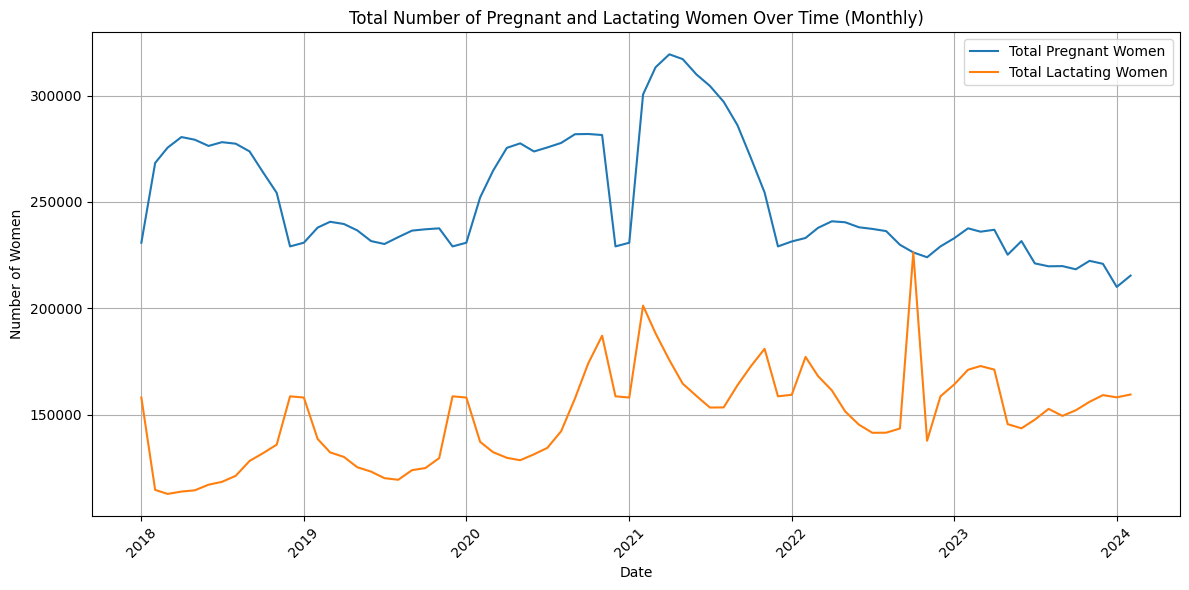

In [32]:
# Plotting the monthly data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Tot_PW', data=monthly_data, label='Total Pregnant Women')
sns.lineplot(x='Date', y='Tot_LW', data=monthly_data, label='Total Lactating Women')
plt.title('Total Number of Pregnant and Lactating Women Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Women')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

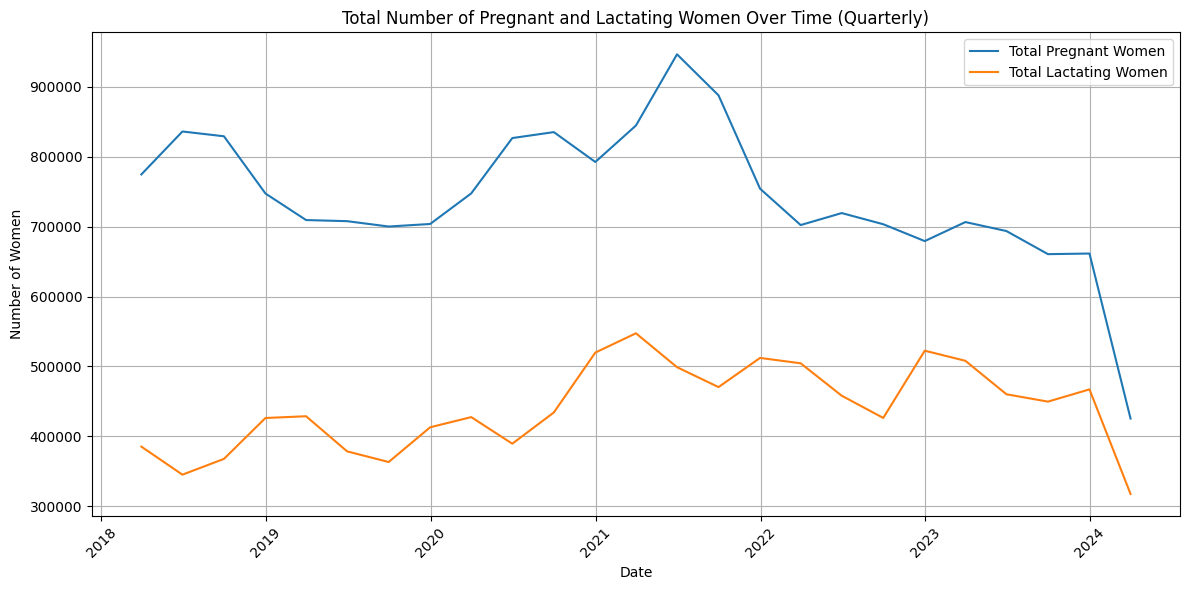

In [33]:
# Plotting the quarterly data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Tot_PW', data=quarterly_data, label='Total Pregnant Women')
sns.lineplot(x='Date', y='Tot_LW', data=quarterly_data, label='Total Lactating Women')
plt.title('Total Number of Pregnant and Lactating Women Over Time (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Number of Women')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Aggregate data by district
district_data = combined_df.groupby('D_Name').agg({'Tot_PW': 'sum', 'Tot_LW': 'sum'}).reset_index()

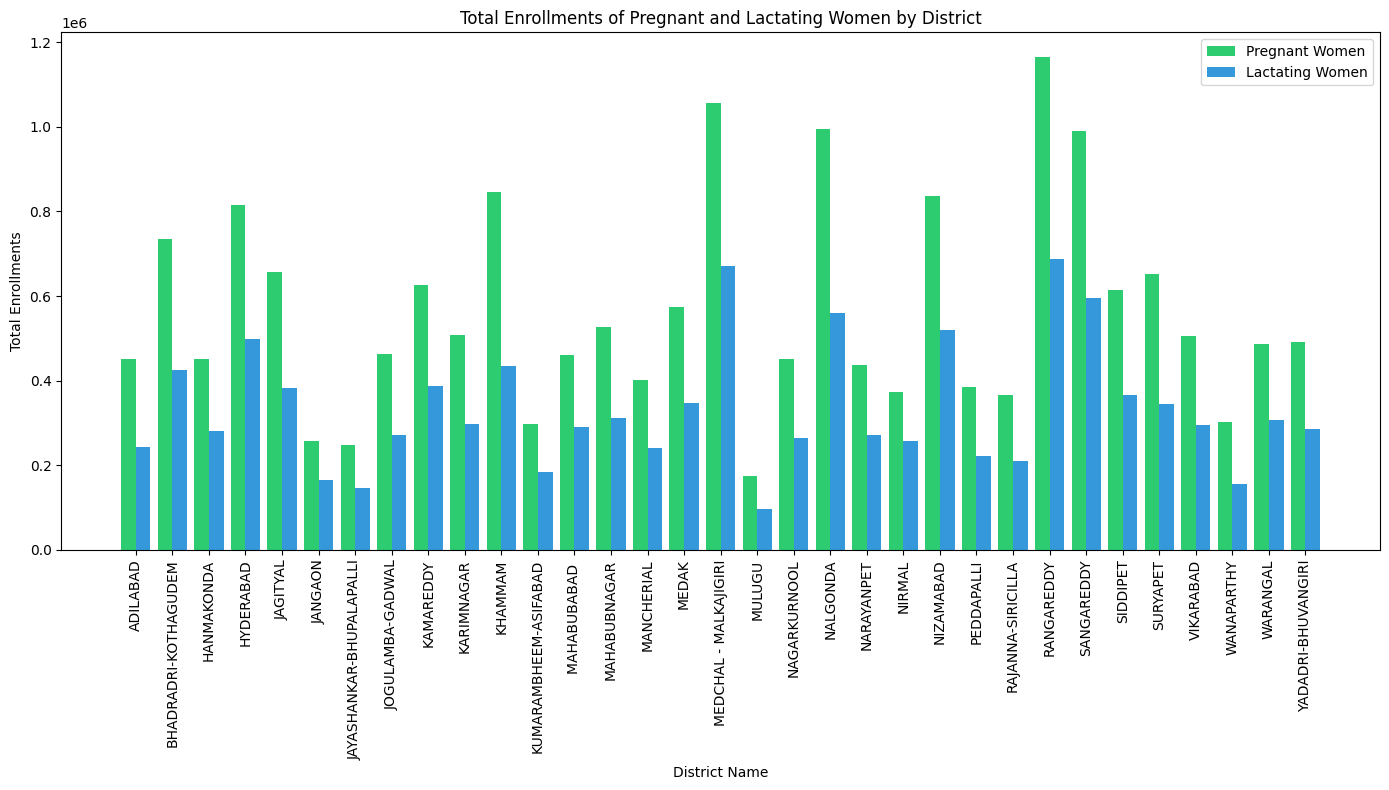

In [35]:
# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Colors for the bars
colors = ['#2ECC71', '#3498DB']

# Plotting the bar chart
bar_width = 0.4
index = range(len(district_data))

# Bars for Pregnant Women
ax.bar(index, district_data['Tot_PW'], bar_width, color=colors[0], label='Pregnant Women')

# Bars for Lactating Women
ax.bar([i + bar_width for i in index], district_data['Tot_LW'], bar_width, color=colors[1], label='Lactating Women')

# Adding labels and title
ax.set_xlabel('District Name')
ax.set_ylabel('Total Enrollments')
ax.set_title('Total Enrollments of Pregnant and Lactating Women by District')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(district_data['D_Name'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [36]:
# Aggregate data by community
community_data = combined_df.groupby('D_Name').agg({
    'Tot_SC_PW': 'sum', 'Tot_ST_PW': 'sum', 'Tot_BC_PW': 'sum', 'Tot_OC_PW': 'sum',
    'Tot_SC_LW': 'sum', 'Tot_ST_LW': 'sum', 'Tot_BC_LW': 'sum', 'Tot_OC_LW': 'sum'
}).reset_index()

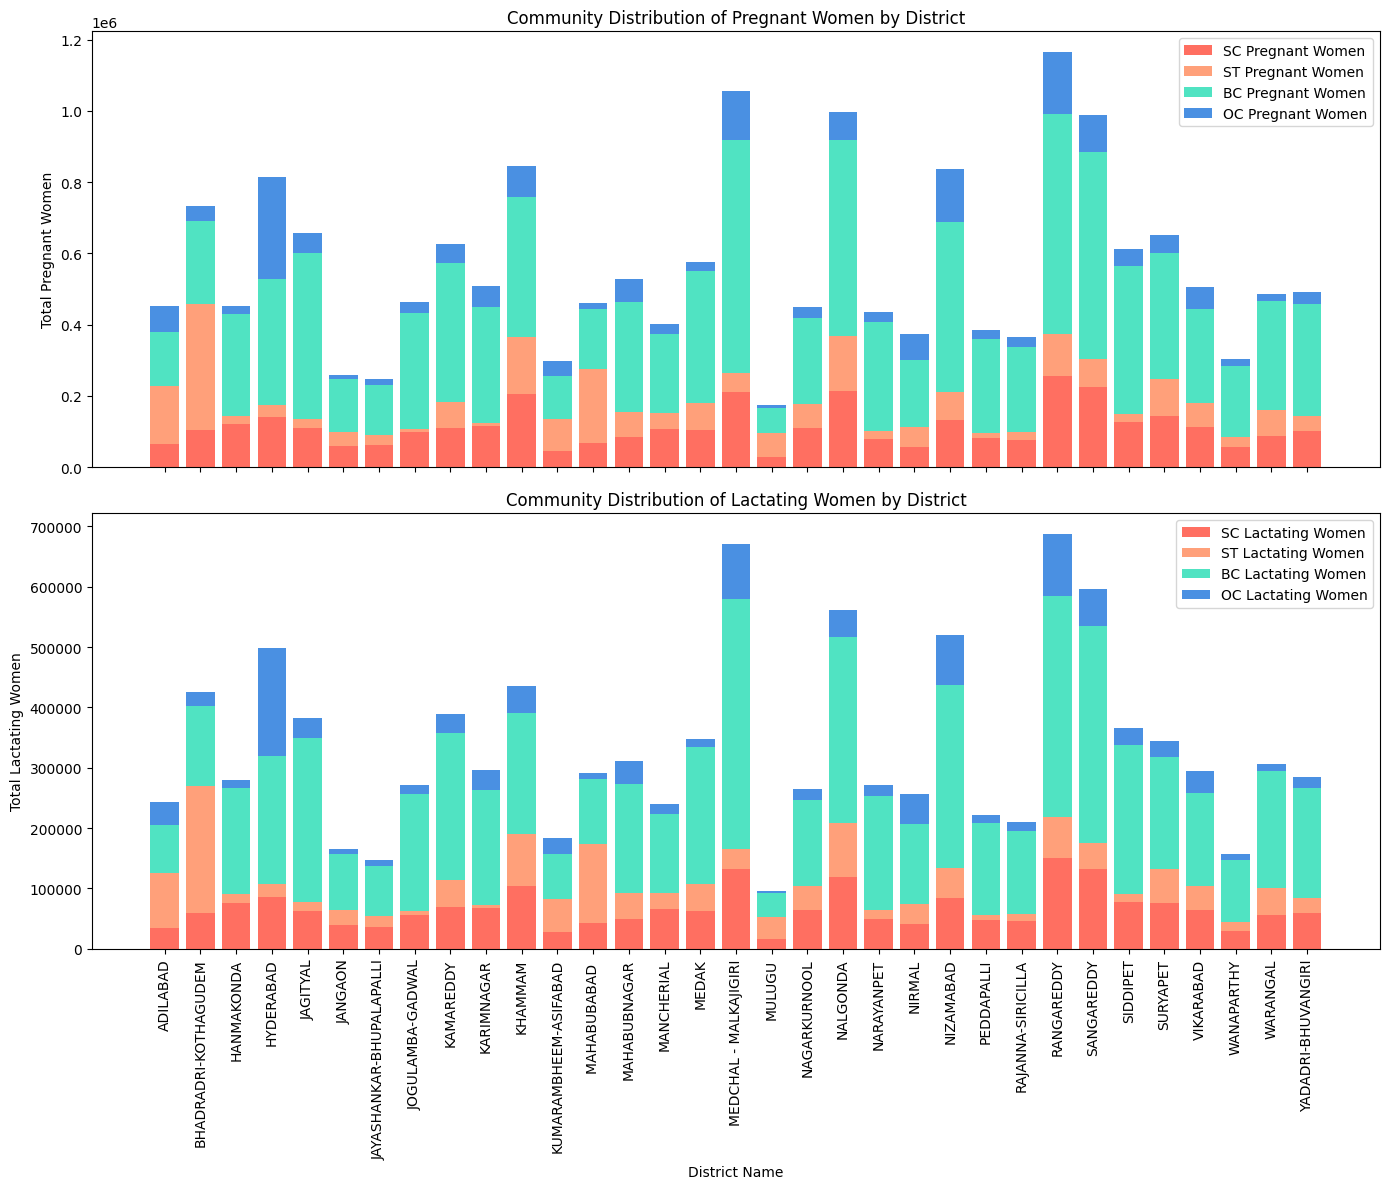

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plotting the data for Pregnant Women
ax = axs[0]
ax.bar(community_data['D_Name'], community_data['Tot_SC_PW'], label='SC Pregnant Women', color='#FF6F61')
ax.bar(community_data['D_Name'], community_data['Tot_ST_PW'], bottom=community_data['Tot_SC_PW'], label='ST Pregnant Women', color='#FFA07A')
ax.bar(community_data['D_Name'], community_data['Tot_BC_PW'], bottom=community_data['Tot_SC_PW'] + community_data['Tot_ST_PW'], label='BC Pregnant Women', color='#50E3C2')
ax.bar(community_data['D_Name'], community_data['Tot_OC_PW'], bottom=community_data['Tot_SC_PW'] + community_data['Tot_ST_PW'] + community_data['Tot_BC_PW'], label='OC Pregnant Women', color='#4A90E2')
ax.set_ylabel('Total Pregnant Women')
ax.set_title('Community Distribution of Pregnant Women by District')
ax.legend()

# Plotting the data for Lactating Women
ax = axs[1]
ax.bar(community_data['D_Name'], community_data['Tot_SC_LW'], label='SC Lactating Women', color='#FF6F61')
ax.bar(community_data['D_Name'], community_data['Tot_ST_LW'], bottom=community_data['Tot_SC_LW'], label='ST Lactating Women', color='#FFA07A')
ax.bar(community_data['D_Name'], community_data['Tot_BC_LW'], bottom=community_data['Tot_SC_LW'] + community_data['Tot_ST_LW'], label='BC Lactating Women', color='#50E3C2')
ax.bar(community_data['D_Name'], community_data['Tot_OC_LW'], bottom=community_data['Tot_SC_LW'] + community_data['Tot_ST_LW'] + community_data['Tot_BC_LW'], label='OC Lactating Women', color='#4A90E2')
ax.set_ylabel('Total Lactating Women')
ax.set_title('Community Distribution of Lactating Women by District')
ax.legend()

# Adding common labels
plt.xlabel('District Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# Calculate total pregnant and lactating women
community_data['Total_PW'] = community_data[['Tot_SC_PW', 'Tot_ST_PW', 'Tot_BC_PW', 'Tot_OC_PW']].sum(axis=1)
community_data['Total_LW'] = community_data[['Tot_SC_LW', 'Tot_ST_LW', 'Tot_BC_LW', 'Tot_OC_LW']].sum(axis=1)

In [39]:
# Calculate percentage distribution
community_data['SC_PW_Percentage'] = (community_data['Tot_SC_PW'] / community_data['Total_PW']) * 100
community_data['ST_PW_Percentage'] = (community_data['Tot_ST_PW'] / community_data['Total_PW']) * 100
community_data['BC_PW_Percentage'] = (community_data['Tot_BC_PW'] / community_data['Total_PW']) * 100
community_data['OC_PW_Percentage'] = (community_data['Tot_OC_PW'] / community_data['Total_PW']) * 100

community_data['SC_LW_Percentage'] = (community_data['Tot_SC_LW'] / community_data['Total_LW']) * 100
community_data['ST_LW_Percentage'] = (community_data['Tot_ST_LW'] / community_data['Total_LW']) * 100
community_data['BC_LW_Percentage'] = (community_data['Tot_BC_LW'] / community_data['Total_LW']) * 100
community_data['OC_LW_Percentage'] = (community_data['Tot_OC_LW'] / community_data['Total_LW']) * 100

In [40]:
community_data['SC_PW_Percentage'].mean()

19.817185990844077

In [41]:
community_data['ST_PW_Percentage'].mean()

14.228241476965314

In [42]:
community_data['BC_PW_Percentage'].mean()

56.32889557116285

In [43]:
community_data['OC_PW_Percentage'].mean()

9.625676961027755

In [44]:
community_data['SC_LW_Percentage'].mean()

19.883133432742778

In [45]:
community_data['ST_LW_Percentage'].mean()

14.250117021812436

In [46]:
community_data['BC_LW_Percentage'].mean()

56.329285232758785

In [47]:
community_data['OC_LW_Percentage'].mean()

9.537464312686012

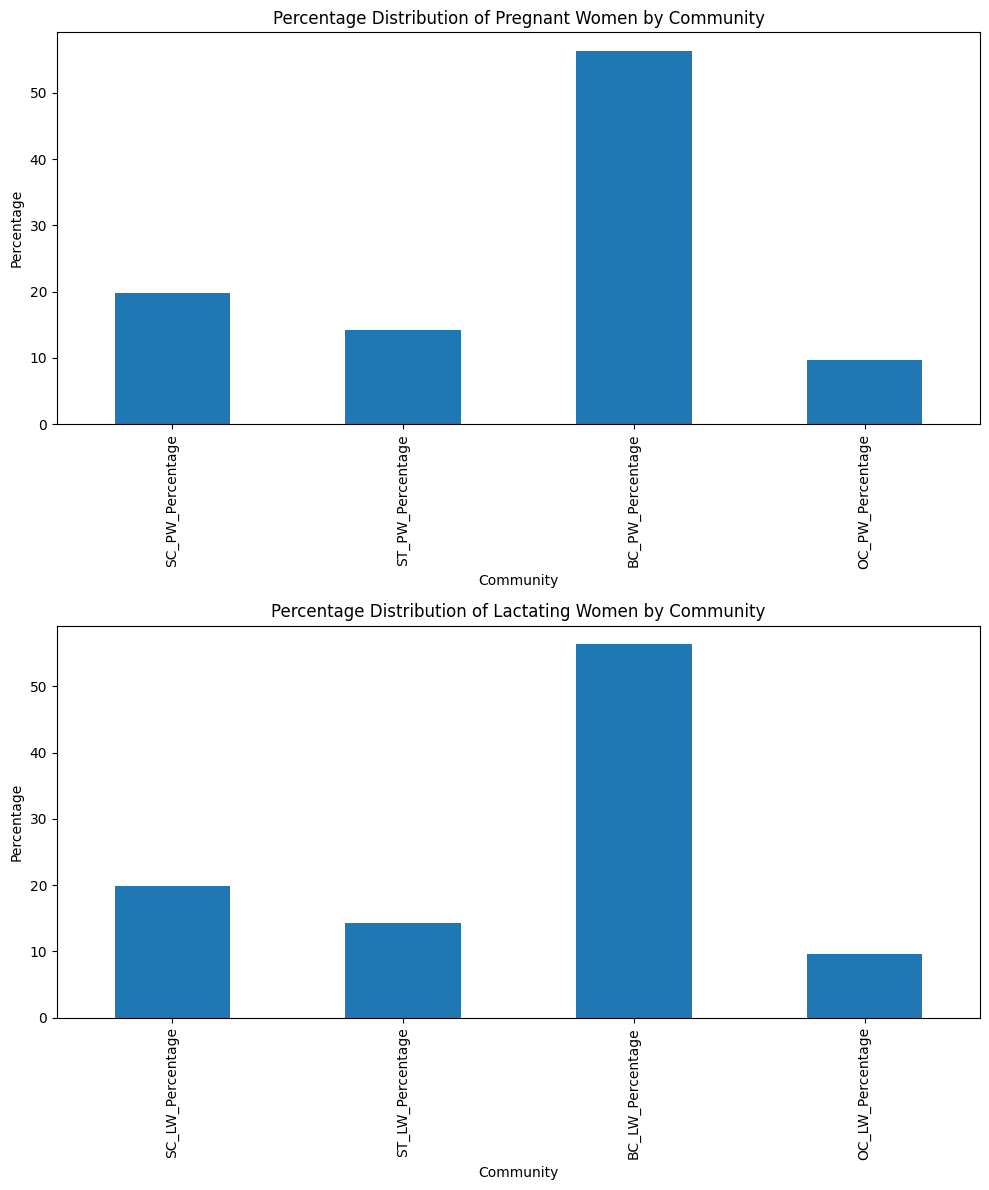

In [48]:
# Plot percentage distribution of pregnant women among communities
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

community_data[['SC_PW_Percentage', 'ST_PW_Percentage', 'BC_PW_Percentage', 'OC_PW_Percentage']].mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('Percentage Distribution of Pregnant Women by Community')
ax[0].set_ylabel('Percentage')
ax[0].set_xlabel('Community')

# Plot percentage distribution of lactating women among communities
community_data[['SC_LW_Percentage', 'ST_LW_Percentage', 'BC_LW_Percentage', 'OC_LW_Percentage']].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('Percentage Distribution of Lactating Women by Community')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Community')

plt.tight_layout()
plt.show()


In [ ]:
#unique_values = combined_df['Sec_NAme'].unique()
#for value in unique_values:
    #print(value)


In [49]:
# Summary Statistics
summary_stats = combined_df.describe()
summary_stats

,Reporting Year,Reporting Month,AWC_ID,Tot_PW,Tot_SC_PW,Tot_ST_PW,Tot_BC_PW,Tot_OC_PW,Tot_LW,Tot_SC_LW,Tot_ST_LW,Tot_BC_LW,Tot_OC_LW,Date
count,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2.641800e+06,2641800
mean,2.020595e+03,6.364865e+00,1.892020e+06,7.039774e+00,1.398534e+00,9.394697e-01,3.955682e+00,7.460887e-01,4.171226e+00,8.269483e-01,5.530585e-01,2.349874e+00,4.413449e-01,2021-01-15 02:16:12.972972288
min,2.018000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018-01-01 00:00:00
25%,2.019000e+03,3.000000e+00,1.702033e+06,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-07-01 00:00:00
50%,2.021000e+03,6.000000e+00,1.913185e+06,6.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2021-01-16 12:00:00
75%,2.022000e+03,9.000000e+00,2.116075e+06,1.000000e+01,2.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,2022-08-01 00:00:00
max,2.024000e+03,1.200000e+01,2.318252e+06,1.320000e+02,4.700000e+01,8.100000e+01,9.600000e+01,1.140000e+02,1.070000e+02,3.500000e+01,8.100000e+01,8.000000e+01,1.060000e+02,2024-02-01 00:00:00
std,1.777631e+00,3.501253e+00,3.007318e+05,6.305948e+00,2.517406e+00,2.082642e+00,4.876429e+00,2.242057e+00,4.106254e+00,1.638075e+00,1.361415e+00,3.149852e+00,1.440323e+00,NaN


In [50]:
# Total numbers for pregnant and lactating women over the course of Jan 2018-Feb 2024
total_pregnant = combined_df['Tot_PW'].sum()
total_lactating = combined_df['Tot_LW'].sum()
print('Total Pregnant Women enrolled :', total_pregnant)
print('Total Lactating Women enrolled :', total_lactating)

Total Pregnant Women enrolled : 18597676
Total Lactating Women enrolled : 11019545


In [51]:
# Average numbers for pregnant and lactating women per project and sector
average_pregnant_per_project = combined_df.groupby('Proj_Name')['Tot_PW'].mean()
average_lactating_per_project = combined_df.groupby('Proj_Name')['Tot_LW'].mean()
print('Average numbers for pregnant women per project :', average_pregnant_per_project)
print('Average numbers for lactating women per project :', average_lactating_per_project)

Average numbers for pregnant women per project : Proj_Name
ACHAMPETA (R)      4.907970
ADILABAD(U)        6.531009
ALAIR (R)          6.979637
ALLADURG           4.716392
ALWAL             19.932181
                    ...    
WARANGAL(U)       11.944481
WARDHANNAPETA      4.481538
YELLANDU           4.301846
YELLAREDDY         5.580640
ZAHEERABAD        10.505929
Name: Tot_PW, Length: 149, dtype: float64
Average numbers for lactating women per project : Proj_Name
ACHAMPETA (R)      2.932363
ADILABAD(U)        3.245839
ALAIR (R)          3.917623
ALLADURG           2.797885
ALWAL             11.644228
                    ...    
WARANGAL(U)        7.655541
WARDHANNAPETA      3.026528
YELLANDU           2.590447
YELLAREDDY         3.558852
ZAHEERABAD         6.692188
Name: Tot_LW, Length: 149, dtype: float64


In [54]:
average_pregnant_per_sector = combined_df.groupby('Sec_NAme')['Tot_PW'].mean()
average_lactating_per_sector = combined_df.groupby('Sec_NAme')['Tot_LW'].mean()
print("Average Number Of Pregnant Women By Sector:", average_pregnant_per_sector)
print("Average Number Of Lactating Women By Sector:", average_lactating_per_sector)

Average Number Of Pregnant Women By Sector: Sec_NAme
125 GAJULARAMARAM       17.173423
126 JAGATHGIRIGUTTA     21.215794
127 RANGAREDDY NAGAR    16.126819
128  CHINTAL            15.871266
129 SURARAM             25.306041
                          ...    
YLR_THIMMAREDDY          3.788932
ZAFFERGADH               4.249324
ZAHEERABAD              16.299228
ZIRRA                   13.103652
ZIYAGUDA                15.022782
Name: Tot_PW, Length: 1346, dtype: float64
Average Number Of Lactating Women By Sector: Sec_NAme
125 GAJULARAMARAM       12.117868
126 JAGATHGIRIGUTTA     14.840372
127 RANGAREDDY NAGAR    10.871622
128  CHINTAL            11.058321
129 SURARAM             15.549285
                          ...    
YLR_THIMMAREDDY          2.349421
ZAFFERGADH               2.522973
ZAHEERABAD              10.622780
ZIRRA                    9.127282
ZIYAGUDA                 9.216675
Name: Tot_LW, Length: 1346, dtype: float64


In [55]:
# Top and Bottom Performers
top_projects_pregnant = combined_df.groupby('Proj_Name')['Tot_PW'].sum().nlargest(10)
bottom_projects_pregnant = combined_df.groupby('Proj_Name')['Tot_PW'].sum().nsmallest(10)

top_sectors_pregnant = combined_df.groupby('Sec_NAme')['Tot_PW'].sum().nlargest(10)
bottom_sectors_pregnant = combined_df.groupby('Sec_NAme')['Tot_PW'].sum().nsmallest(10)

top_projects_lactating = combined_df.groupby('Proj_Name')['Tot_LW'].sum().nlargest(10)
bottom_projects_lactating = combined_df.groupby('Proj_Name')['Tot_LW'].sum().nsmallest(10)

top_sectors_lactating = combined_df.groupby('Sec_NAme')['Tot_LW'].sum().nlargest(10)
bottom_sectors_lactating = combined_df.groupby('Sec_NAme')['Tot_LW'].sum().nsmallest(10)

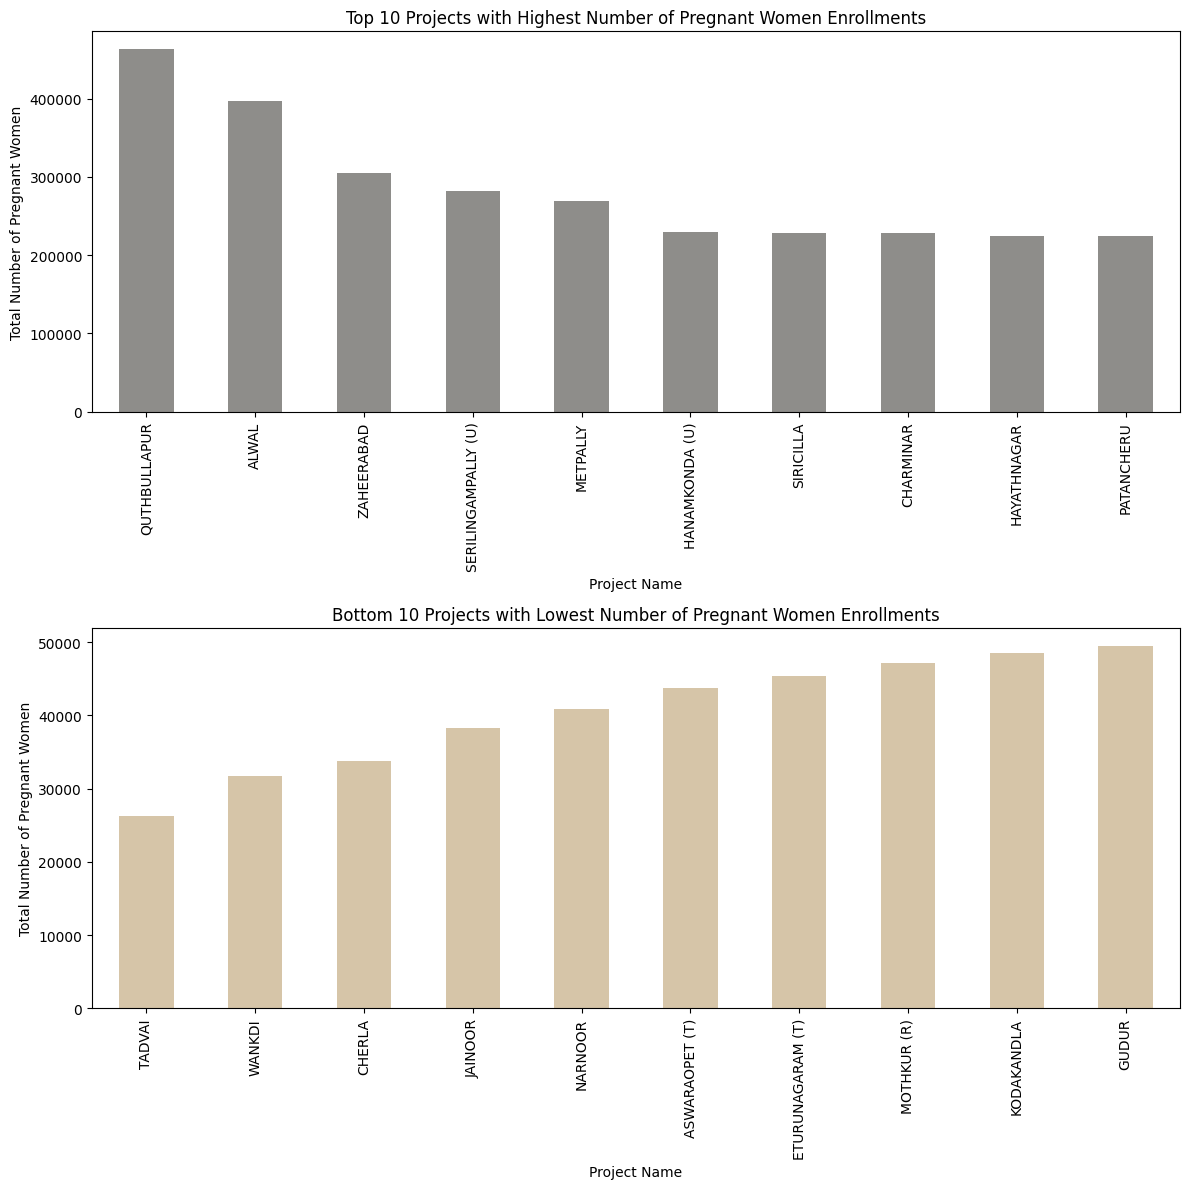

In [56]:
# Plotting the top 10 Projects
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
top_projects_pregnant.plot(kind='bar', ax=ax[0], color='#8E8D8A')
ax[0].set_title('Top 10 Projects with Highest Number of Pregnant Women Enrollments')
ax[0].set_ylabel('Total Number of Pregnant Women')
ax[0].set_xlabel('Project Name')

# Plotting the bottom 10 Projects
bottom_projects_pregnant.plot(kind='bar', ax=ax[1], color='#D6C5A8')
ax[1].set_title('Bottom 10 Projects with Lowest Number of Pregnant Women Enrollments')
ax[1].set_ylabel('Total Number of Pregnant Women')
ax[1].set_xlabel('Project Name')

plt.tight_layout()
plt.show()

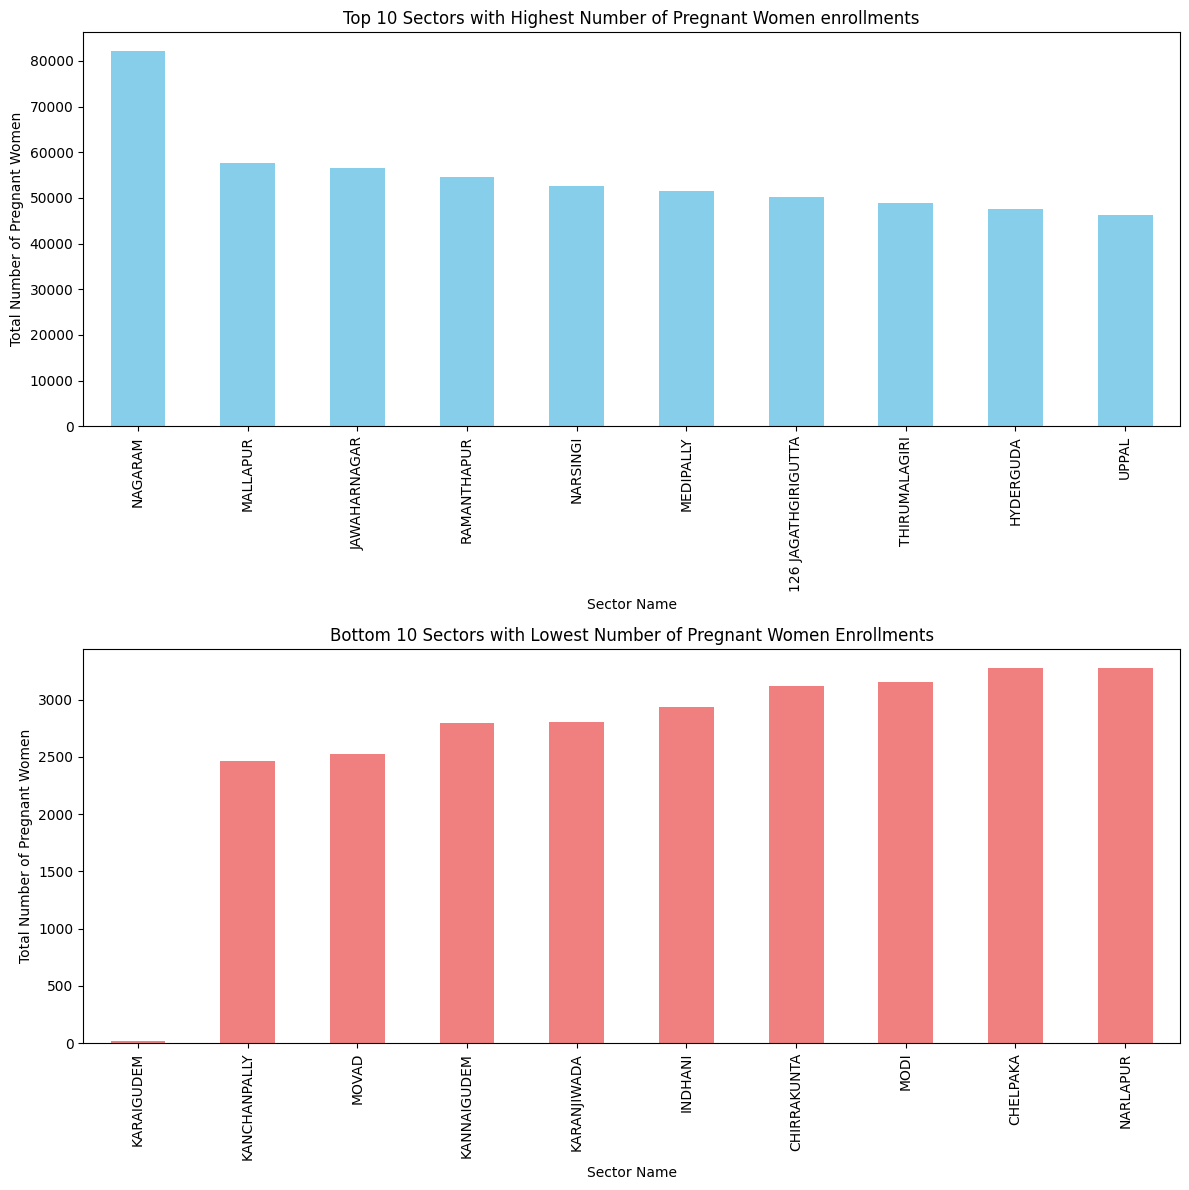

In [57]:
# Plotting the top 10 sectors
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
top_sectors_pregnant.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Top 10 Sectors with Highest Number of Pregnant Women enrollments')
ax[0].set_ylabel('Total Number of Pregnant Women')
ax[0].set_xlabel('Sector Name')

# Plotting the bottom 10 sectors
bottom_sectors_pregnant.plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title('Bottom 10 Sectors with Lowest Number of Pregnant Women Enrollments')
ax[1].set_ylabel('Total Number of Pregnant Women')
ax[1].set_xlabel('Sector Name')

plt.tight_layout()
plt.show()

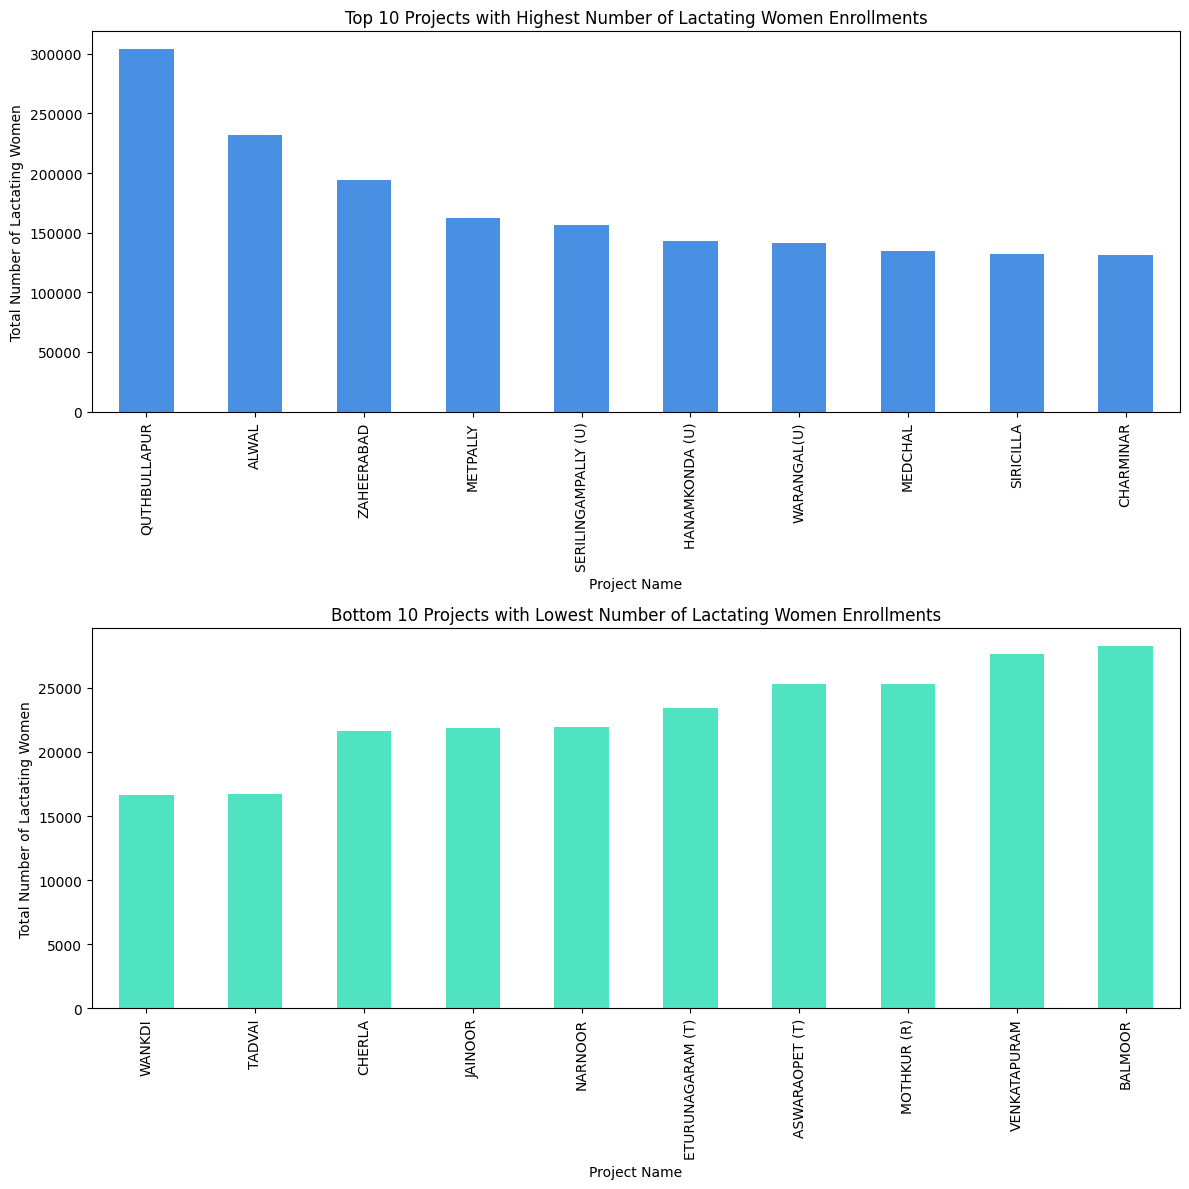

In [58]:
# Plotting the top 10 Projects
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
top_projects_lactating.plot(kind='bar', ax=ax[0], color='#4A90E2')
ax[0].set_title('Top 10 Projects with Highest Number of Lactating Women Enrollments')
ax[0].set_ylabel('Total Number of Lactating Women')
ax[0].set_xlabel('Project Name')

# Plotting the bottom 10 Projects
bottom_projects_lactating.plot(kind='bar', ax=ax[1], color='#50E3C2')
ax[1].set_title('Bottom 10 Projects with Lowest Number of Lactating Women Enrollments')
ax[1].set_ylabel('Total Number of Lactating Women')
ax[1].set_xlabel('Project Name')

plt.tight_layout()
plt.show()

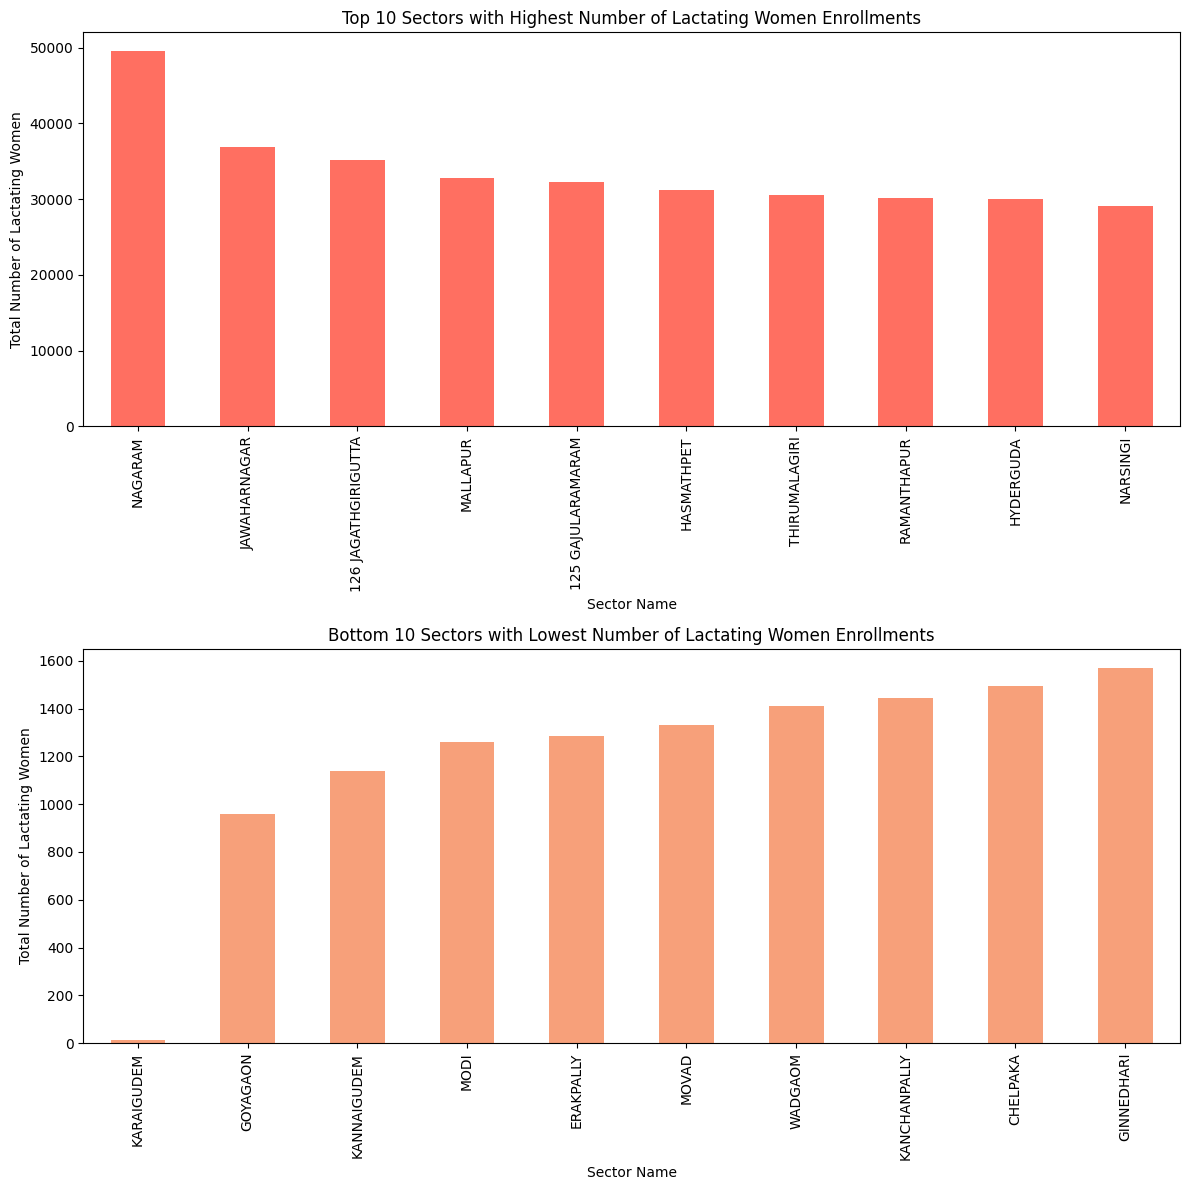

In [59]:
# Plotting the top 10 Sectors
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
top_sectors_lactating.plot(kind='bar', ax=ax[0], color='#FF6F61')
ax[0].set_title('Top 10 Sectors with Highest Number of Lactating Women Enrollments')
ax[0].set_ylabel('Total Number of Lactating Women')
ax[0].set_xlabel('Sector Name')

# Plotting the bottom 10 Sectors
bottom_sectors_lactating.plot(kind='bar', ax=ax[1], color='#F7A07A')
ax[1].set_title('Bottom 10 Sectors with Lowest Number of Lactating Women Enrollments')
ax[1].set_ylabel('Total Number of Lactating Women')
ax[1].set_xlabel('Sector Name')

plt.tight_layout()
plt.show()

In [60]:
# Trend Analysis
monthly_trend = combined_df.groupby(combined_df['Date'].dt.to_period('M')).agg({'Tot_PW': 'sum', 'Tot_LW': 'sum'})
yearly_trend = combined_df.groupby(combined_df['Date'].dt.to_period('Y')).agg({'Tot_PW': 'sum', 'Tot_LW': 'sum'})
print(monthly_trend)
print(yearly_trend)

         Tot_PW  Tot_LW
Date                   
2018-01  230825  157981
2018-02  268362  114528
2018-03  275577  112632
2018-04  280545  113734
2018-05  279300  114330
...         ...     ...
2023-10  218325  151987
2023-11  222305  155979
2023-12  220895  159125
2024-01  210035  158071
2024-02  215337  159397

[74 rows x 2 columns]
       Tot_PW   Tot_LW
Date                  
2018  3187799  1523898
2019  2821346  1582978
2020  3202342  1770548
2021  3433770  2028755
2022  2804574  1911155
2023  2722473  1884743
2024   425372   317468


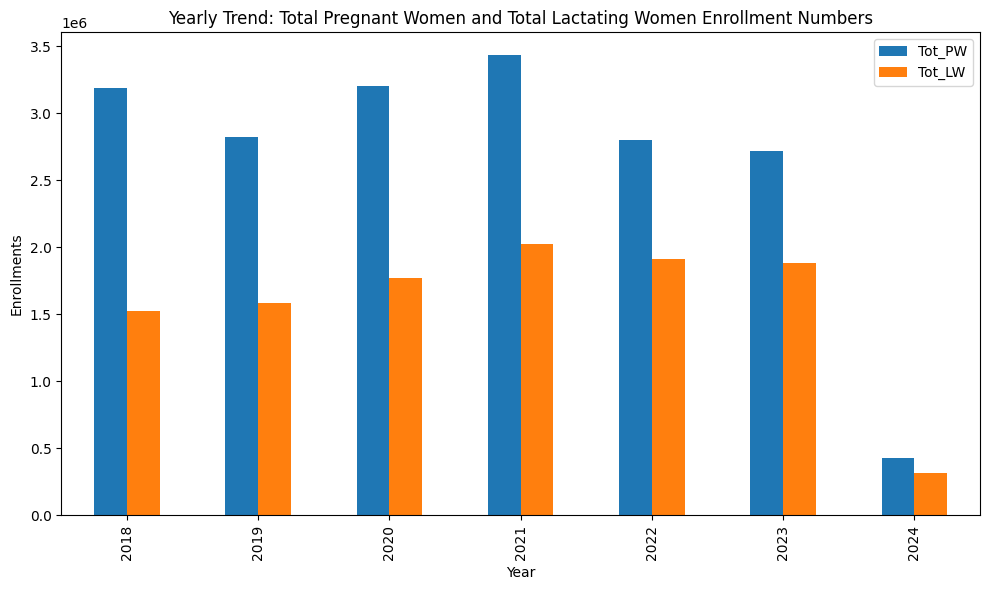

In [61]:
# Plot 
fig, ax = plt.subplots(figsize=(10, 6))

yearly_trend.plot(kind='bar', ax=ax)
ax.set_title('Yearly Trend: Total Pregnant Women and Total Lactating Women Enrollment Numbers')
ax.set_ylabel('Enrollments')
ax.set_xlabel('Year')

plt.tight_layout()
plt.show()


In [63]:
# Community Distribution
# Pregnant Women Enrollments

community_distribution_project = combined_df.groupby('Proj_Name').agg({
    'Tot_SC_PW': 'sum', 'Tot_ST_PW': 'sum', 'Tot_BC_PW': 'sum', 'Tot_OC_PW': 'sum',
    'Tot_SC_LW': 'sum', 'Tot_ST_LW': 'sum', 'Tot_BC_LW': 'sum', 'Tot_OC_LW': 'sum'
})

community_distribution_project['Total_PW'] = community_distribution_project[['Tot_SC_PW', 'Tot_ST_PW', 'Tot_BC_PW', 'Tot_OC_PW']].sum(axis=1)
community_distribution_project['Total_LW'] = community_distribution_project[['Tot_SC_LW', 'Tot_ST_LW', 'Tot_BC_LW', 'Tot_OC_LW']].sum(axis=1)

community_distribution_sector = combined_df.groupby('Sec_NAme').agg({
    'Tot_SC_PW': 'sum', 'Tot_ST_PW': 'sum', 'Tot_BC_PW': 'sum', 'Tot_OC_PW': 'sum',
    'Tot_SC_LW': 'sum', 'Tot_ST_LW': 'sum', 'Tot_BC_LW': 'sum', 'Tot_OC_LW': 'sum'
})

community_distribution_sector['Total_PW'] = community_distribution_sector[['Tot_SC_PW', 'Tot_ST_PW', 'Tot_BC_PW', 'Tot_OC_PW']].sum(axis=1)
community_distribution_sector['Total_LW'] = community_distribution_sector[['Tot_SC_LW', 'Tot_ST_LW', 'Tot_BC_LW', 'Tot_OC_LW']].sum(axis=1)

# Calculate community percentages for each project and sector
community_distribution_project['SC_PW_Percentage'] = (community_distribution_project['Tot_SC_PW'] / community_distribution_project['Total_PW']) * 100
community_distribution_project['ST_PW_Percentage'] = (community_distribution_project['Tot_ST_PW'] / community_distribution_project['Total_PW']) * 100
community_distribution_project['BC_PW_Percentage'] = (community_distribution_project['Tot_BC_PW'] / community_distribution_project['Total_PW']) * 100
community_distribution_project['OC_PW_Percentage'] = (community_distribution_project['Tot_OC_PW'] / community_distribution_project['Total_PW']) * 100

community_distribution_sector['SC_PW_Percentage'] = (community_distribution_sector['Tot_SC_PW'] / community_distribution_sector['Total_PW']) * 100
community_distribution_sector['ST_PW_Percentage'] = (community_distribution_sector['Tot_ST_PW'] / community_distribution_sector['Total_PW']) * 100
community_distribution_sector['BC_PW_Percentage'] = (community_distribution_sector['Tot_BC_PW'] / community_distribution_sector['Total_PW']) * 100
community_distribution_sector['OC_PW_Percentage'] = (community_distribution_sector['Tot_OC_PW'] / community_distribution_sector['Total_PW']) * 100

# Lactating Women Enrollments

# Calculate community percentages for each project and sector
community_distribution_project['SC_LW_Percentage'] = (community_distribution_project['Tot_SC_LW'] / community_distribution_project['Total_LW']) * 100
community_distribution_project['ST_LW_Percentage'] = (community_distribution_project['Tot_ST_LW'] / community_distribution_project['Total_LW']) * 100
community_distribution_project['BC_LW_Percentage'] = (community_distribution_project['Tot_BC_LW'] / community_distribution_project['Total_LW']) * 100
community_distribution_project['OC_LW_Percentage'] = (community_distribution_project['Tot_OC_LW'] / community_distribution_project['Total_LW']) * 100

community_distribution_sector['SC_LW_Percentage'] = (community_distribution_sector['Tot_SC_LW'] / community_distribution_sector['Total_LW']) * 100
community_distribution_sector['ST_LW_Percentage'] = (community_distribution_sector['Tot_ST_LW'] / community_distribution_sector['Total_LW']) * 100
community_distribution_sector['BC_LW_Percentage'] = (community_distribution_sector['Tot_BC_LW'] / community_distribution_sector['Total_LW']) * 100
community_distribution_sector['OC_LW_Percentage'] = (community_distribution_sector['Tot_OC_LW'] / community_distribution_sector['Total_LW']) * 100


In [65]:
from IPython.display import display

# Plot for community distribution for Pregnant Women by Project
community_distribution_project_pw = community_distribution_project[['SC_PW_Percentage', 'ST_PW_Percentage', 'BC_PW_Percentage', 'OC_PW_Percentage']]
display(community_distribution_project_pw.style.format("{:.2f}%").background_gradient(cmap='Blues'))


,SC_PW_Percentage,ST_PW_Percentage,BC_PW_Percentage,OC_PW_Percentage
Proj_Name,,,,
ACHAMPETA (R),26.25%,30.91%,36.38%,6.46%
ADILABAD(U),13.89%,17.84%,40.23%,28.04%
ALAIR (R),19.95%,12.07%,63.19%,4.79%
ALLADURG,17.97%,11.76%,66.95%,3.31%
ALWAL,25.38%,5.93%,57.90%,10.79%
AMANGAL,24.17%,27.19%,43.25%,5.40%
ANUMULA,20.81%,23.65%,47.78%,7.76%
ARMOOR,19.14%,6.32%,63.87%,10.67%
ASIFABAD,14.22%,32.10%,47.50%,6.18%


In [66]:
# Display the community distribution for Lactating Women by Project
community_distribution_project_lw = community_distribution_project[['SC_LW_Percentage', 'ST_LW_Percentage', 'BC_LW_Percentage', 'OC_LW_Percentage']]
display(community_distribution_project_lw.style.format("{:.2f}%").background_gradient(cmap='Greens'))


,SC_LW_Percentage,ST_LW_Percentage,BC_LW_Percentage,OC_LW_Percentage
Proj_Name,,,,
ACHAMPETA (R),25.97%,30.72%,37.31%,5.99%
ADILABAD(U),13.30%,18.59%,40.64%,27.47%
ALAIR (R),19.93%,12.70%,63.04%,4.32%
ALLADURG,17.75%,11.59%,67.26%,3.41%
ALWAL,25.57%,5.61%,57.67%,11.16%
AMANGAL,24.34%,27.25%,43.25%,5.16%
ANUMULA,20.57%,24.46%,47.01%,7.97%
ARMOOR,18.84%,6.39%,64.75%,10.02%
ASIFABAD,15.00%,31.02%,47.26%,6.72%


In [67]:
# Display the community distribution for Pregnant Women by Sector
community_distribution_sector_pw = community_distribution_sector[['SC_PW_Percentage', 'ST_PW_Percentage', 'BC_PW_Percentage', 'OC_PW_Percentage']]
display(community_distribution_sector_pw.style.format("{:.2f}%").background_gradient(cmap='Oranges'))


,SC_PW_Percentage,ST_PW_Percentage,BC_PW_Percentage,OC_PW_Percentage
Sec_NAme,,,,
125 GAJULARAMARAM,9.79%,2.90%,67.82%,19.50%
126 JAGATHGIRIGUTTA,16.79%,3.24%,70.60%,9.37%
127 RANGAREDDY NAGAR,9.57%,2.31%,75.22%,12.90%
128 CHINTAL,15.39%,2.84%,74.53%,7.24%
129 SURARAM,12.99%,4.71%,66.01%,16.28%
130 SUBASH NAGAR,14.89%,4.34%,66.86%,13.91%
131 QUTHBULLAPUR,20.04%,7.11%,59.70%,13.15%
132 JEEDIMETLA,15.90%,3.04%,71.70%,9.37%
A S R COLONY,24.03%,18.55%,49.19%,8.23%


In [68]:
# Display the community distribution for Lactating Women by Sector
community_distribution_sector_lw = community_distribution_sector[['SC_LW_Percentage', 'ST_LW_Percentage', 'BC_LW_Percentage', 'OC_LW_Percentage']]
display(community_distribution_sector_lw.style.format("{:.2f}%").background_gradient(cmap='Purples'))

,SC_LW_Percentage,ST_LW_Percentage,BC_LW_Percentage,OC_LW_Percentage
Sec_NAme,,,,
125 GAJULARAMARAM,9.87%,2.85%,68.25%,19.04%
126 JAGATHGIRIGUTTA,16.36%,2.95%,71.41%,9.28%
127 RANGAREDDY NAGAR,10.35%,2.21%,74.04%,13.41%
128 CHINTAL,13.89%,2.95%,75.26%,7.90%
129 SURARAM,13.53%,4.81%,64.22%,17.44%
130 SUBASH NAGAR,14.76%,4.74%,66.49%,14.00%
131 QUTHBULLAPUR,20.65%,7.02%,58.67%,13.66%
132 JEEDIMETLA,17.64%,2.45%,70.11%,9.80%
A S R COLONY,27.29%,16.22%,47.34%,9.16%


In [69]:
# Summary of Key Findings
print("Summary Statistics:\n", summary_stats)
print("\nTotal Pregnant Women:", total_pregnant)
print("Total Lactating Women:", total_lactating)

print("\nTop 10 Projects by Number of Pregnant Women:\n", top_projects_pregnant)
print("\nBottom 10 Projects by Number of Pregnant Women:\n", bottom_projects_pregnant)

print("\nTop 10 Sectors by Number of Pregnant Women:\n", top_sectors_pregnant)
print("\nBottom 10 Sectors by Number of Pregnant Women:\n", bottom_sectors_pregnant)

Summary Statistics:
        Reporting Year  Reporting Month        AWC_ID        Tot_PW  \
count    2.641800e+06     2.641800e+06  2.641800e+06  2.641800e+06   
mean     2.020595e+03     6.364865e+00  1.892020e+06  7.039774e+00   
min      2.018000e+03     1.000000e+00  0.000000e+00  0.000000e+00   
25%      2.019000e+03     3.000000e+00  1.702033e+06  3.000000e+00   
50%      2.021000e+03     6.000000e+00  1.913185e+06  6.000000e+00   
75%      2.022000e+03     9.000000e+00  2.116075e+06  1.000000e+01   
max      2.024000e+03     1.200000e+01  2.318252e+06  1.320000e+02   
std      1.777631e+00     3.501253e+00  3.007318e+05  6.305948e+00   

          Tot_SC_PW     Tot_ST_PW     Tot_BC_PW     Tot_OC_PW        Tot_LW  \
count  2.641800e+06  2.641800e+06  2.641800e+06  2.641800e+06  2.641800e+06   
mean   1.398534e+00  9.394697e-01  3.955682e+00  7.460887e-01  4.171226e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+0

In [70]:
print("\nTop 10 Projects by Number of Lactating Women:\n", top_projects_lactating)
print("\nBottom 10 Projects by Number of Lactating Women:\n", bottom_projects_lactating)

print("\nTop 10 Sectors by Number of Lactating Women:\n", top_sectors_lactating)
print("\nBottom 10 Sectors by Number of Lactating Women:\n", bottom_sectors_lactating)

print("\nMonthly Trend:\n", monthly_trend)
print("\nYearly Trend:\n", yearly_trend)

print("\nCommunity Distribution by Project:\n", community_distribution_project[['SC_PW_Percentage', 'ST_PW_Percentage', 'BC_PW_Percentage', 'OC_PW_Percentage']])
print("\nCommunity Distribution by Sector:\n", community_distribution_sector[['SC_PW_Percentage', 'ST_PW_Percentage', 'BC_PW_Percentage', 'OC_PW_Percentage']])




Top 10 Projects by Number of Lactating Women:
 Proj_Name
QUTHBULLAPUR           303590
ALWAL                  231790
ZAHEERABAD             194127
METPALLY               162370
SERILINGAMPALLY (U)    156171
HANAMKONDA (U)         143333
WARANGAL(U)            141061
MEDCHAL                134599
SIRICILLA              131977
CHARMINAR              131527
Name: Tot_LW, dtype: int64

Bottom 10 Projects by Number of Lactating Women:
 Proj_Name
WANKDI              16602
TADVAI              16688
CHERLA              21611
JAINOOR             21859
NARNOOR             21932
ETURUNAGARAM (T)    23396
ASWARAOPET (T)      25277
MOTHKUR (R)         25327
VENKATAPURAM        27615
BALMOOR             28245
Name: Tot_LW, dtype: int64

Top 10 Sectors by Number of Lactating Women:
 Sec_NAme
NAGARAM                49563
JAWAHARNAGAR           36918
126 JAGATHGIRIGUTTA    35142
MALLAPUR               32772
125 GAJULARAMARAM      32282
HASMATHPET             31215
THIRUMALAGIRI          30529
RAMANTHA

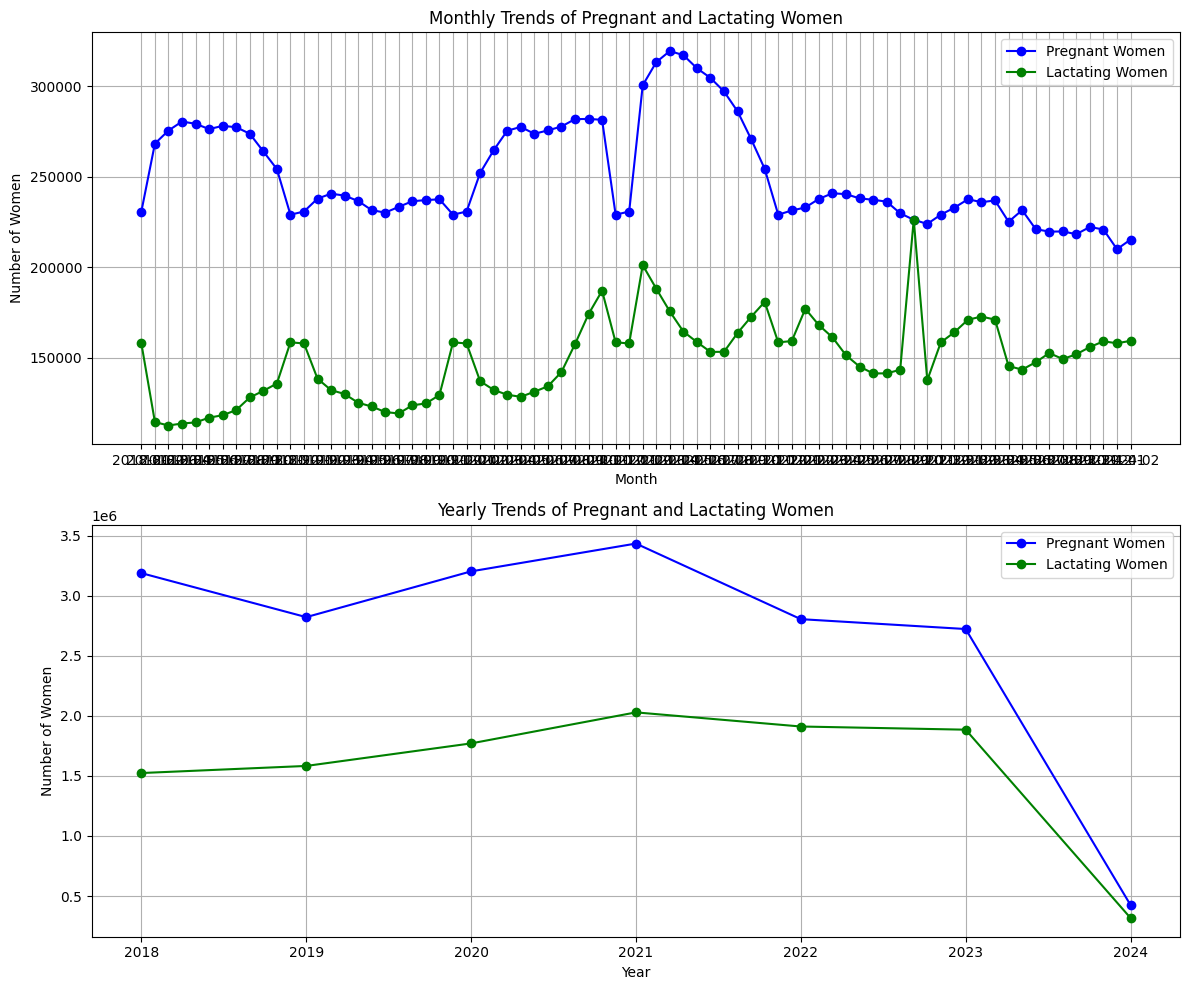

In [71]:
# Plotting the trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Monthly trend
axes[0].plot(monthly_trend.index.astype(str), monthly_trend['Tot_PW'], marker='o', linestyle='-', color='b', label='Pregnant Women')
axes[0].plot(monthly_trend.index.astype(str), monthly_trend['Tot_LW'], marker='o', linestyle='-', color='g', label='Lactating Women')
axes[0].set_title('Monthly Trends of Pregnant and Lactating Women')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Women')
axes[0].legend()
axes[0].grid(True)

# Yearly trend
axes[1].plot(yearly_trend.index.astype(str), yearly_trend['Tot_PW'], marker='o', linestyle='-', color='b', label='Pregnant Women')
axes[1].plot(yearly_trend.index.astype(str), yearly_trend['Tot_LW'], marker='o', linestyle='-', color='g', label='Lactating Women')
axes[1].set_title('Yearly Trends of Pregnant and Lactating Women')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Women')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

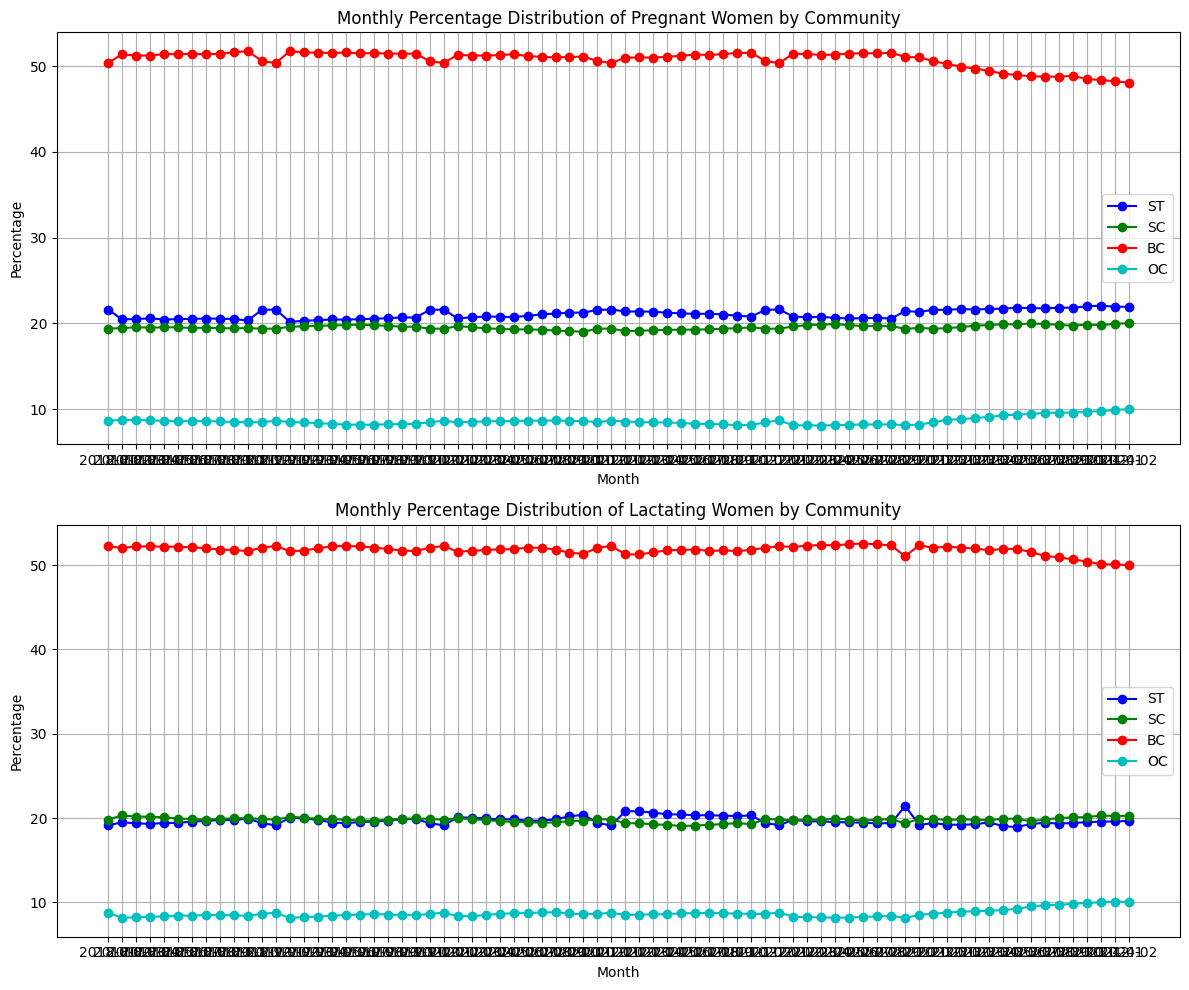

In [72]:
# Bifurcation Analysis
# Calculate proportions of pregnant and lactating women for each community category
combined_df['Total_PW'] = combined_df['Tot_SC_PW'] + combined_df['Tot_ST_PW'] + combined_df['Tot_BC_PW'] + combined_df['Tot_OC_PW']
combined_df['Total_LW'] = combined_df['Tot_SC_LW'] + combined_df['Tot_ST_LW'] + combined_df['Tot_BC_LW'] + combined_df['Tot_OC_LW']

combined_df['ST_PW_Percentage'] = (combined_df['Tot_ST_PW'] / combined_df['Total_PW']) * 100
combined_df['SC_PW_Percentage'] = (combined_df['Tot_SC_PW'] / combined_df['Total_PW']) * 100
combined_df['BC_PW_Percentage'] = (combined_df['Tot_BC_PW'] / combined_df['Total_PW']) * 100
combined_df['OC_PW_Percentage'] = (combined_df['Tot_OC_PW'] / combined_df['Total_PW']) * 100

combined_df['ST_LW_Percentage'] = (combined_df['Tot_ST_LW'] / combined_df['Total_LW']) * 100
combined_df['SC_LW_Percentage'] = (combined_df['Tot_SC_LW'] / combined_df['Total_LW']) * 100
combined_df['BC_LW_Percentage'] = (combined_df['Tot_BC_LW'] / combined_df['Total_LW']) * 100
combined_df['OC_LW_Percentage'] = (combined_df['Tot_OC_LW'] / combined_df['Total_LW']) * 100

# Aggregate data by month and year
monthly_trend = combined_df.groupby(combined_df['Date'].dt.to_period('M')).agg({
    'ST_PW_Percentage': 'mean', 'SC_PW_Percentage': 'mean', 'BC_PW_Percentage': 'mean', 'OC_PW_Percentage': 'mean',
    'ST_LW_Percentage': 'mean', 'SC_LW_Percentage': 'mean', 'BC_LW_Percentage': 'mean', 'OC_LW_Percentage': 'mean'
})

yearly_trend = combined_df.groupby(combined_df['Date'].dt.to_period('Y')).agg({
    'ST_PW_Percentage': 'mean', 'SC_PW_Percentage': 'mean', 'BC_PW_Percentage': 'mean', 'OC_PW_Percentage': 'mean',
    'ST_LW_Percentage': 'mean', 'SC_LW_Percentage': 'mean', 'BC_LW_Percentage': 'mean', 'OC_LW_Percentage': 'mean'
})

# Plotting the trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Monthly trend of pregnant women by community
axes[0].plot(monthly_trend.index.astype(str), monthly_trend['ST_PW_Percentage'], marker='o', linestyle='-', color='b', label='ST')
axes[0].plot(monthly_trend.index.astype(str), monthly_trend['SC_PW_Percentage'], marker='o', linestyle='-', color='g', label='SC')
axes[0].plot(monthly_trend.index.astype(str), monthly_trend['BC_PW_Percentage'], marker='o', linestyle='-', color='r', label='BC')
axes[0].plot(monthly_trend.index.astype(str), monthly_trend['OC_PW_Percentage'], marker='o', linestyle='-', color='c', label='OC')
axes[0].set_title('Monthly Percentage Distribution of Pregnant Women by Community')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Percentage')
axes[0].legend()
axes[0].grid(True)

# Monthly trend of lactating women by community
axes[1].plot(monthly_trend.index.astype(str), monthly_trend['ST_LW_Percentage'], marker='o', linestyle='-', color='b', label='ST')
axes[1].plot(monthly_trend.index.astype(str), monthly_trend['SC_LW_Percentage'], marker='o', linestyle='-', color='g', label='SC')
axes[1].plot(monthly_trend.index.astype(str), monthly_trend['BC_LW_Percentage'], marker='o', linestyle='-', color='r', label='BC')
axes[1].plot(monthly_trend.index.astype(str), monthly_trend['OC_LW_Percentage'], marker='o', linestyle='-', color='c', label='OC')
axes[1].set_title('Monthly Percentage Distribution of Lactating Women by Community')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [73]:
# Aggregate data by district
district_enrollment = combined_df.groupby('D_Name').agg({
    'Tot_PW': 'sum', 'Tot_LW': 'sum'
}).reset_index()

# Identify districts with the highest and lowest enrollments
district_enrollment_sorted = district_enrollment.sort_values(by='Tot_PW', ascending=False)

highest_enrollment_districts = district_enrollment_sorted.head(5)  # Top 5 districts with highest enrollment
lowest_enrollment_districts = district_enrollment_sorted.tail(5)   # Top 5 districts with lowest enrollment

print("Districts with Highest Enrollments of Pregnant and Lactating Women:")
print(highest_enrollment_districts[['D_Name', 'Tot_PW', 'Tot_LW']])

print("\nDistricts with Lowest Enrollments of Pregnant and Lactating Women:")
print(lowest_enrollment_districts[['D_Name', 'Tot_PW', 'Tot_LW']])

Districts with Highest Enrollments of Pregnant and Lactating Women:
                   D_Name   Tot_PW  Tot_LW
25             RANGAREDDY  1165263  687655
16  MEDCHAL - MALKAJIGIRI  1056642  669979
19               NALGONDA   996091  560785
26             SANGAREDDY   989842  595901
10                KHAMMAM   844950  435117

Districts with Lowest Enrollments of Pregnant and Lactating Women:
                      D_Name  Tot_PW  Tot_LW
30                WANAPARTHY  302878  156320
11     KUMARAMBHEEM-ASIFABAD  297647  184187
5                    JANGAON  257816  165361
6   JAYASHANKAR-BHUPALAPALLI  247007  146941
17                    MULUGU  174313   96618


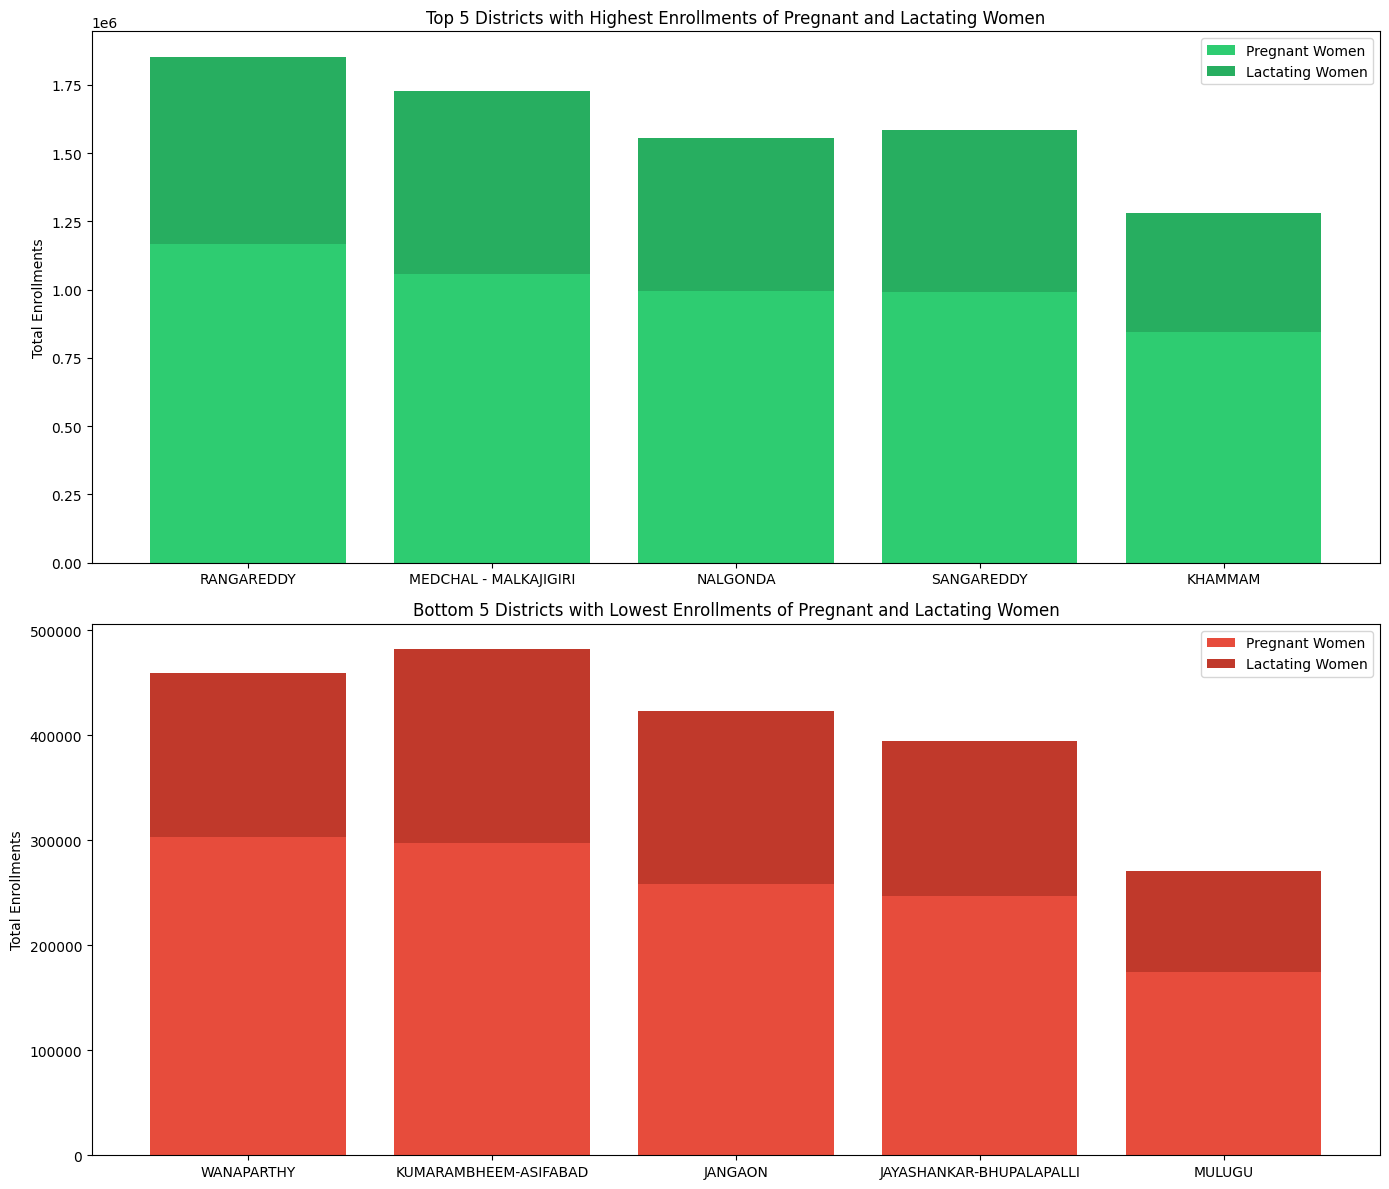

In [75]:

# Create bar charts for districts with the highest and lowest enrollments
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Colors for the bars
colors_high = ['#2ECC71', '#27AE60']
colors_low = ['#E74C3C', '#C0392B']

# Plotting the top 5 districts
axs[0].bar(highest_enrollment_districts['D_Name'], highest_enrollment_districts['Tot_PW'], color=colors_high[0], label='Pregnant Women')
axs[0].bar(highest_enrollment_districts['D_Name'], highest_enrollment_districts['Tot_LW'], bottom=highest_enrollment_districts['Tot_PW'], color=colors_high[1], label='Lactating Women')
axs[0].set_title('Top 5 Districts with Highest Enrollments of Pregnant and Lactating Women')
axs[0].set_ylabel('Total Enrollments')
axs[0].legend()

# Plotting the bottom 5 districts
axs[1].bar(lowest_enrollment_districts['D_Name'], lowest_enrollment_districts['Tot_PW'], color=colors_low[0], label='Pregnant Women')
axs[1].bar(lowest_enrollment_districts['D_Name'], lowest_enrollment_districts['Tot_LW'], bottom=lowest_enrollment_districts['Tot_PW'], color=colors_low[1], label='Lactating Women')
axs[1].set_title('Bottom 5 Districts with Lowest Enrollments of Pregnant and Lactating Women')
axs[1].set_ylabel('Total Enrollments')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


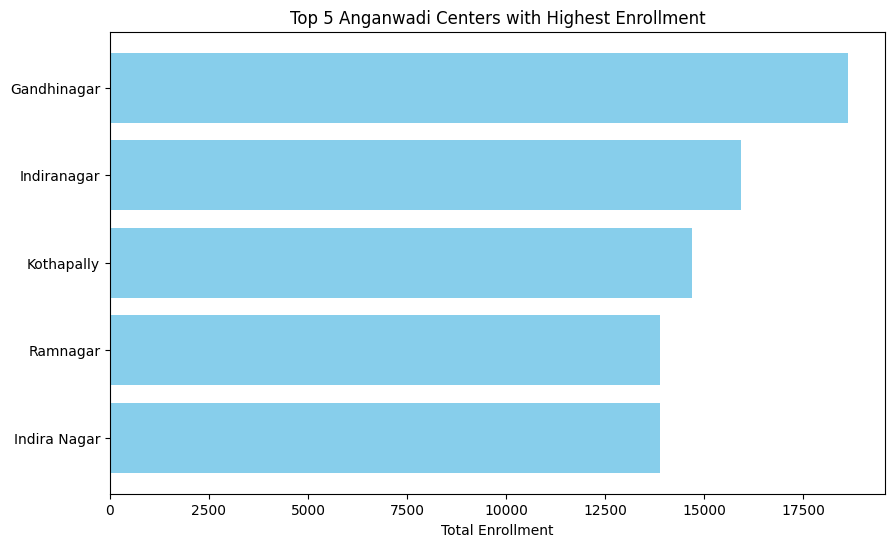

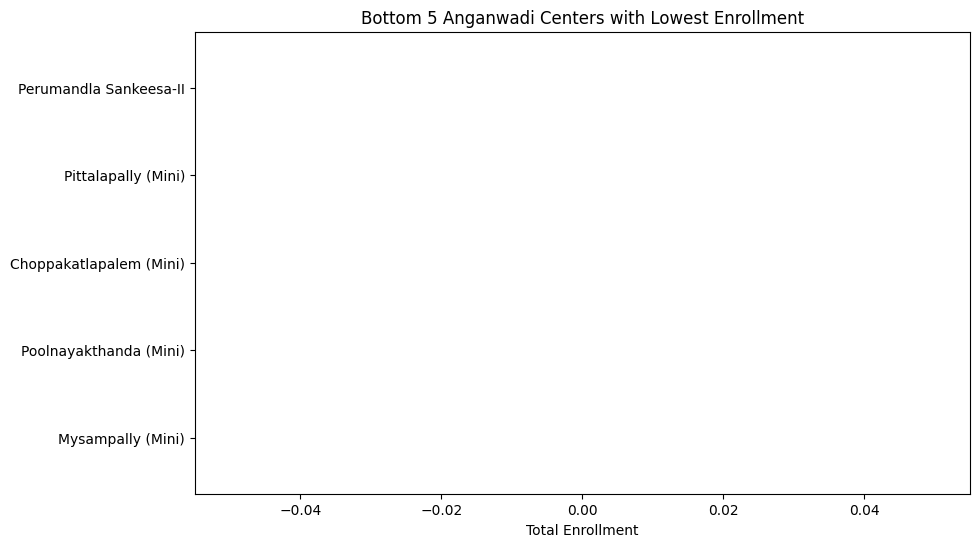

Anganwadi Centers with Highest Enrollment:
           AWc_Name  Total_Enrollment
8944    Gandhinagar             18638
11407   Indiranagar             15937
15558    Kothapally             14693
25870      Ramnagar             13895
11369  Indira Nagar             13880

Anganwadi Centers with Lowest Enrollment:
                      AWc_Name  Total_Enrollment
23871   Perumandla Sankeesa-II                 0
24018      Pittalapally (Mini)                 0
6167   Choppakatlapalem (Mini)                 0
24231   Poolnayakthanda (Mini)                 0
20218        Mysampally (Mini)                 0


In [77]:
# Aggregate data by Anganwadi center
center_enrollment = combined_df.groupby('AWc_Name').agg({
    'Tot_PW': 'sum', 'Tot_LW': 'sum'
}).reset_index()

# Calculate total enrollment (sum of pregnant and lactating women)
center_enrollment['Total_Enrollment'] = center_enrollment['Tot_PW'] + center_enrollment['Tot_LW']

# Identify centers with highest and lowest enrollments
center_enrollment_sorted = center_enrollment.sort_values(by='Total_Enrollment', ascending=False)

highest_enrollment_centers = center_enrollment_sorted.head(5)  # Top 5 centers with highest enrollment
lowest_enrollment_centers = center_enrollment_sorted.tail(5)   # Bottom 5 centers with lowest enrollment

# Plot for the top 5 Anganwadi Centres with Highest Enrollment
plt.figure(figsize=(10, 6))
plt.barh(highest_enrollment_centers['AWc_Name'], highest_enrollment_centers['Total_Enrollment'], color='skyblue')
plt.xlabel('Total Enrollment')
plt.title('Top 5 Anganwadi Centers with Highest Enrollment')
plt.gca().invert_yaxis()
plt.show()

# Plot for the bottom 5 Anganwadi Centres with Lowest Enrollment
plt.figure(figsize=(10, 6))
plt.barh(lowest_enrollment_centers['AWc_Name'], lowest_enrollment_centers['Total_Enrollment'], color='red')
plt.xlabel('Total Enrollment')
plt.title('Bottom 5 Anganwadi Centers with Lowest Enrollment')
plt.gca().invert_yaxis()
plt.show()

# Print results
print("Anganwadi Centers with Highest Enrollment:")
print(highest_enrollment_centers[['AWc_Name', 'Total_Enrollment']])

print("\nAnganwadi Centers with Lowest Enrollment:")
print(lowest_enrollment_centers[['AWc_Name', 'Total_Enrollment']])

In [ ]:
# Load the original combined dataset from CSV
#original_csv_path = r'D:\combined_data.csv'  # Replace with the actual path to your CSV file
#new_combined_df = pd.read_csv(original_csv_path)



In [ ]:
# Now, replace combined_df with the new data
#combined_df = new_combined_df.copy()  # Use .copy() to avoid modifying the original DataFrame reference

# Display the first few rows to verify
#print(combined_df.head())